   #         Title: Wisconsin Diagnostic Breast Cancer (WDBC)

### Source Information

Citation :
   This breast cancer databases was obtained from the University of Wisconsin                               
   Hospitals, Madison from Dr. William H. Wolberg.
   
a) Creators: 
>   Dr. William H. Wolberg, General Surgery Dept., University of                         
	Wisconsin,  Clinical Sciences Center, Madison, WI 53792                                  
	wolberg@eagle.surgery.wisc.edu
	

>	W. Nick Street, Computer Sciences Dept., University of                                 
	Wisconsin, 1210 West Dayton St., Madison, WI 53706                                          
	street@cs.wisc.edu  608-262-6619 

>	Olvi L. Mangasarian, Computer Sciences Dept., University of                                                  
	Wisconsin, 1210 West Dayton St., Madison, WI 53706                             
	olvi@cs.wisc.edu 





4. Relevant information

	Features are computed from a digitized image of a fine needle
	aspirate (FNA) of a breast mass.  They describe
	characteristics of the cell nuclei present in the image.
	A few of the images can be found at
	http://www.cs.wisc.edu/~street/images/

	Separating plane described above was obtained using
	Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
	Construction Via Linear Programming." Proceedings of the 4th
	Midwest Artificial Intelligence and Cognitive Science Society,
	pp. 97-101, 1992], a classification method which uses linear
	programming to construct a decision tree.  Relevant features
	were selected using an exhaustive search in the space of 1-4
	features and 1-3 separating planes.

	The actual linear program used to obtain the separating plane
	in the 3-dimensional space is that described in:
	[K. P. Bennett and O. L. Mangasarian: "Robust Linear
	Programming Discrimination of Two Linearly Inseparable Sets",
	Optimization Methods and Software 1, 1992, 23-34].

#### importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.
C:\Users\nikil reddy\Ana\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\nikil reddy\Ana\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\nikil reddy\Ana\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\nikil reddy\Ana\envs\te

#### load data 

In [3]:
data=pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


Missing attribute values: none

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)

Attribute information

1  -------  ID number

2  -------    Diagnosis (M = malignant, B = benign)

3-32 ---  Ten real-valued features are computed for each cell nucleus:
>a) radius (mean of distances from center to points on the perimeter)               
>b) texture (standard deviation of gray-scale values)                                     
>c) perimeter                        
>d) area                               
>e) smoothness (local variation in radius lengths)                                                 
>f) compactness (perimeter^2 / area - 1.0)                                                             
>g) concavity (severity of concave portions of the contour)                                                            
>h) concave points (number of concave portions of the contour)                                                  
>i) symmetry                                                                             
>j) fractal dimension ("coastline approximation" - 1)                                      

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.



In [6]:
df=data
df.drop(['id'],axis=1,inplace=True)

In [7]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
y=df.iloc[:,0].values
x=df.iloc[:,1:].values

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [10]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

Diagnosis:                 
>M(malignant) = 1                                    
>B(benign) = 0

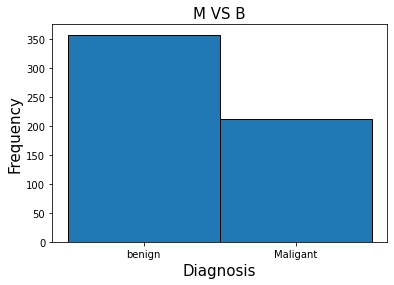

In [11]:
plt.hist(y, bins=[-.5,.5,1.5], ec="k")
plt.xlabel('Diagnosis',fontsize=15)
plt.xticks([0, 1], ['benign', 'Maligant'])
plt.ylabel('Frequency',fontsize=15)
plt.title('M VS B',fontsize=15)
plt.show()

In [12]:
e,c = np.unique(y, return_counts=True)
print(e)
print(c)

[0 1]
[357 212]


Class distribution: 
> 357 benign                                           
>212 malignant

In [13]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [14]:
subset_features= ['radius_mean', 'texture_mean', 'perimeter_mean', 'symmetry_mean','fractal_dimension_mean',
                     'area_mean', 'smoothness_mean', 'compactness_mean','concavity_mean','concave points_mean','diagnosis']
sub=data[subset_features]
grouped = data.groupby(data.diagnosis)
mal=grouped.get_group("M")
ben=grouped.get_group("B")

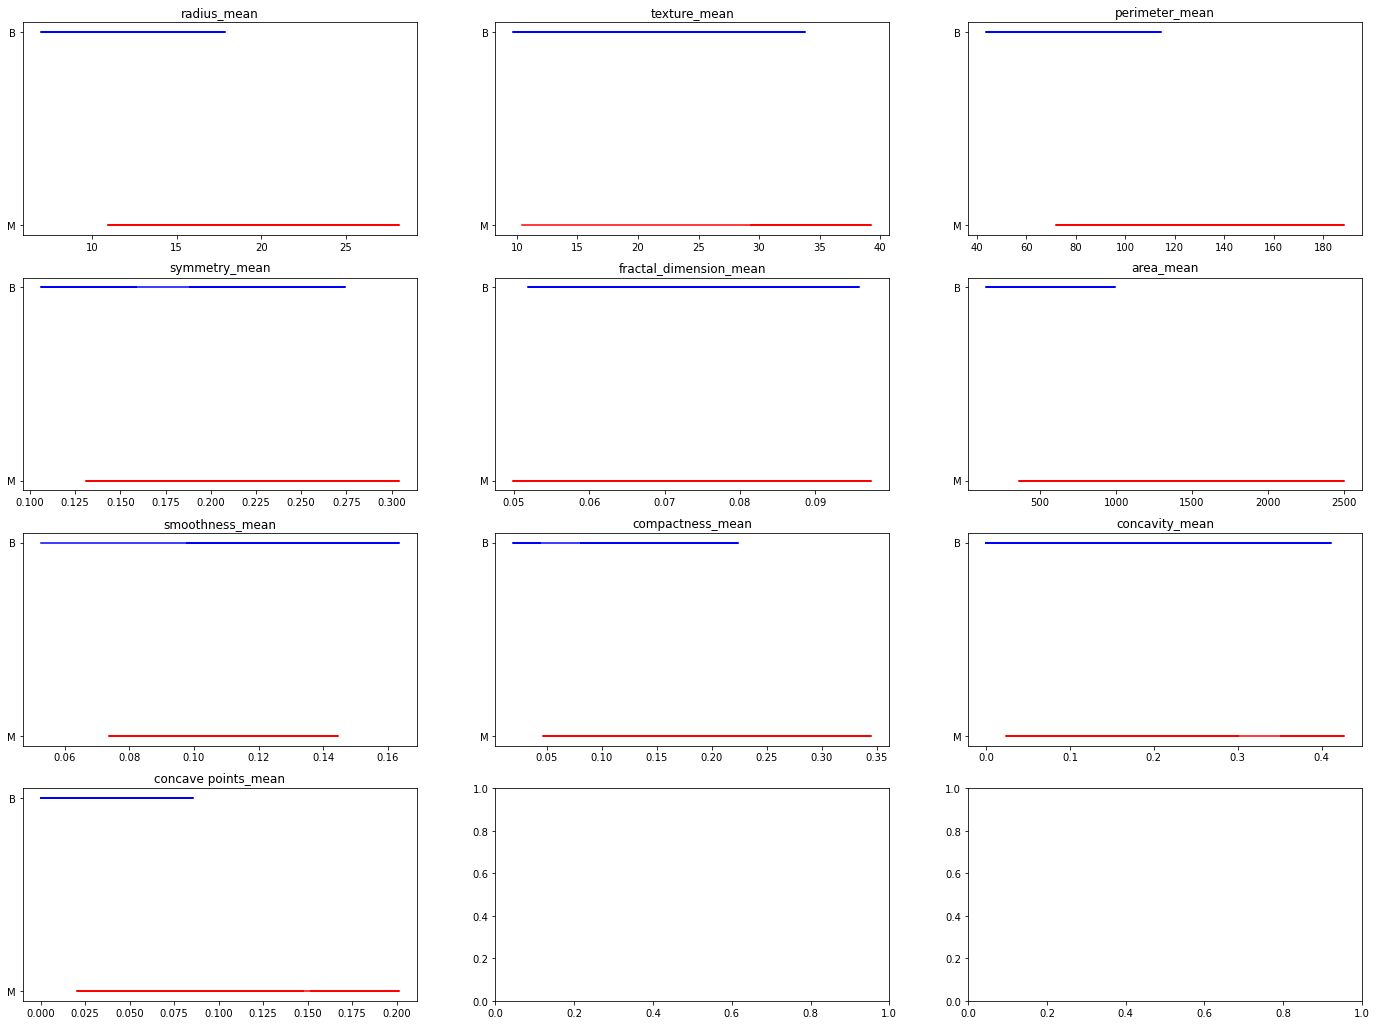

In [15]:
fig, ax =  plt.subplots(4,3,figsize=(24,18))

y=data['diagnosis']
import numpy as np
ax[0][0].plot(mal['radius_mean'],mal['diagnosis'],'r')
ax[0][0].plot(ben['radius_mean'],ben['diagnosis'],'b')
ax[0][0].set_title('radius_mean')
ax[0][1].plot(mal['texture_mean'],mal['diagnosis'],'r')
ax[0][1].plot(ben['texture_mean'],ben['diagnosis'],'b')
ax[0][1].set_title('texture_mean')
ax[0][2].plot(mal['perimeter_mean'],mal['diagnosis'],'r')
ax[0][2].plot(ben['perimeter_mean'],ben['diagnosis'],'b')
ax[0][2].set_title('perimeter_mean')
ax[1][0].plot(mal['symmetry_mean'],mal['diagnosis'],'r')
ax[1][0].plot(ben['symmetry_mean'],ben['diagnosis'],'b')
ax[1][0].set_title('symmetry_mean')
ax[1][1].plot(mal['fractal_dimension_mean'],mal['diagnosis'],'r')
ax[1][1].plot(ben['fractal_dimension_mean'],ben['diagnosis'],'b')
ax[1][1].set_title('fractal_dimension_mean')
ax[1][2].plot(mal['area_mean'],mal['diagnosis'],'r')
ax[1][2].plot(ben['area_mean'],ben['diagnosis'],'b')
ax[1][2].set_title('area_mean')
ax[2][0].plot(mal['smoothness_mean'],mal['diagnosis'],'r')
ax[2][0].plot(ben['smoothness_mean'],ben['diagnosis'],'b')
ax[2][0].set_title('smoothness_mean')
ax[2][1].plot(mal['compactness_mean'],mal['diagnosis'],'r')
ax[2][1].plot(ben['compactness_mean'],ben['diagnosis'],'b')
ax[2][1].set_title('compactness_mean')
ax[2][2].plot(mal['concavity_mean'],mal['diagnosis'],'r')
ax[2][2].plot(ben['concavity_mean'],ben['diagnosis'],'b')
ax[2][2].set_title('concavity_mean')
ax[3][0].plot(mal['concave points_mean'],mal['diagnosis'],'r')
ax[3][0].plot(ben['concave points_mean'],ben['diagnosis'],'b')
ax[3][0].set_title('concave points_mean')
plt.show()

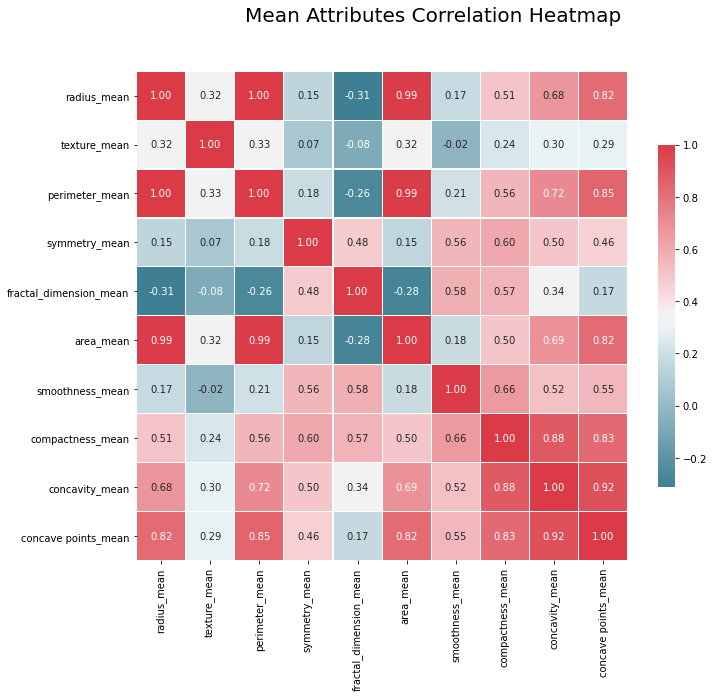

In [16]:
# Compute the correlation matrix
import seaborn as sns
corr = sub.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

t= f.suptitle('Mean Attributes Correlation Heatmap', fontsize=20)
# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5,
           # center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
hm = sns.heatmap(corr, annot=True, ax=ax, cmap=cmap,fmt='.2f',
                 linewidths=.1,cbar_kws={"shrink": .7})


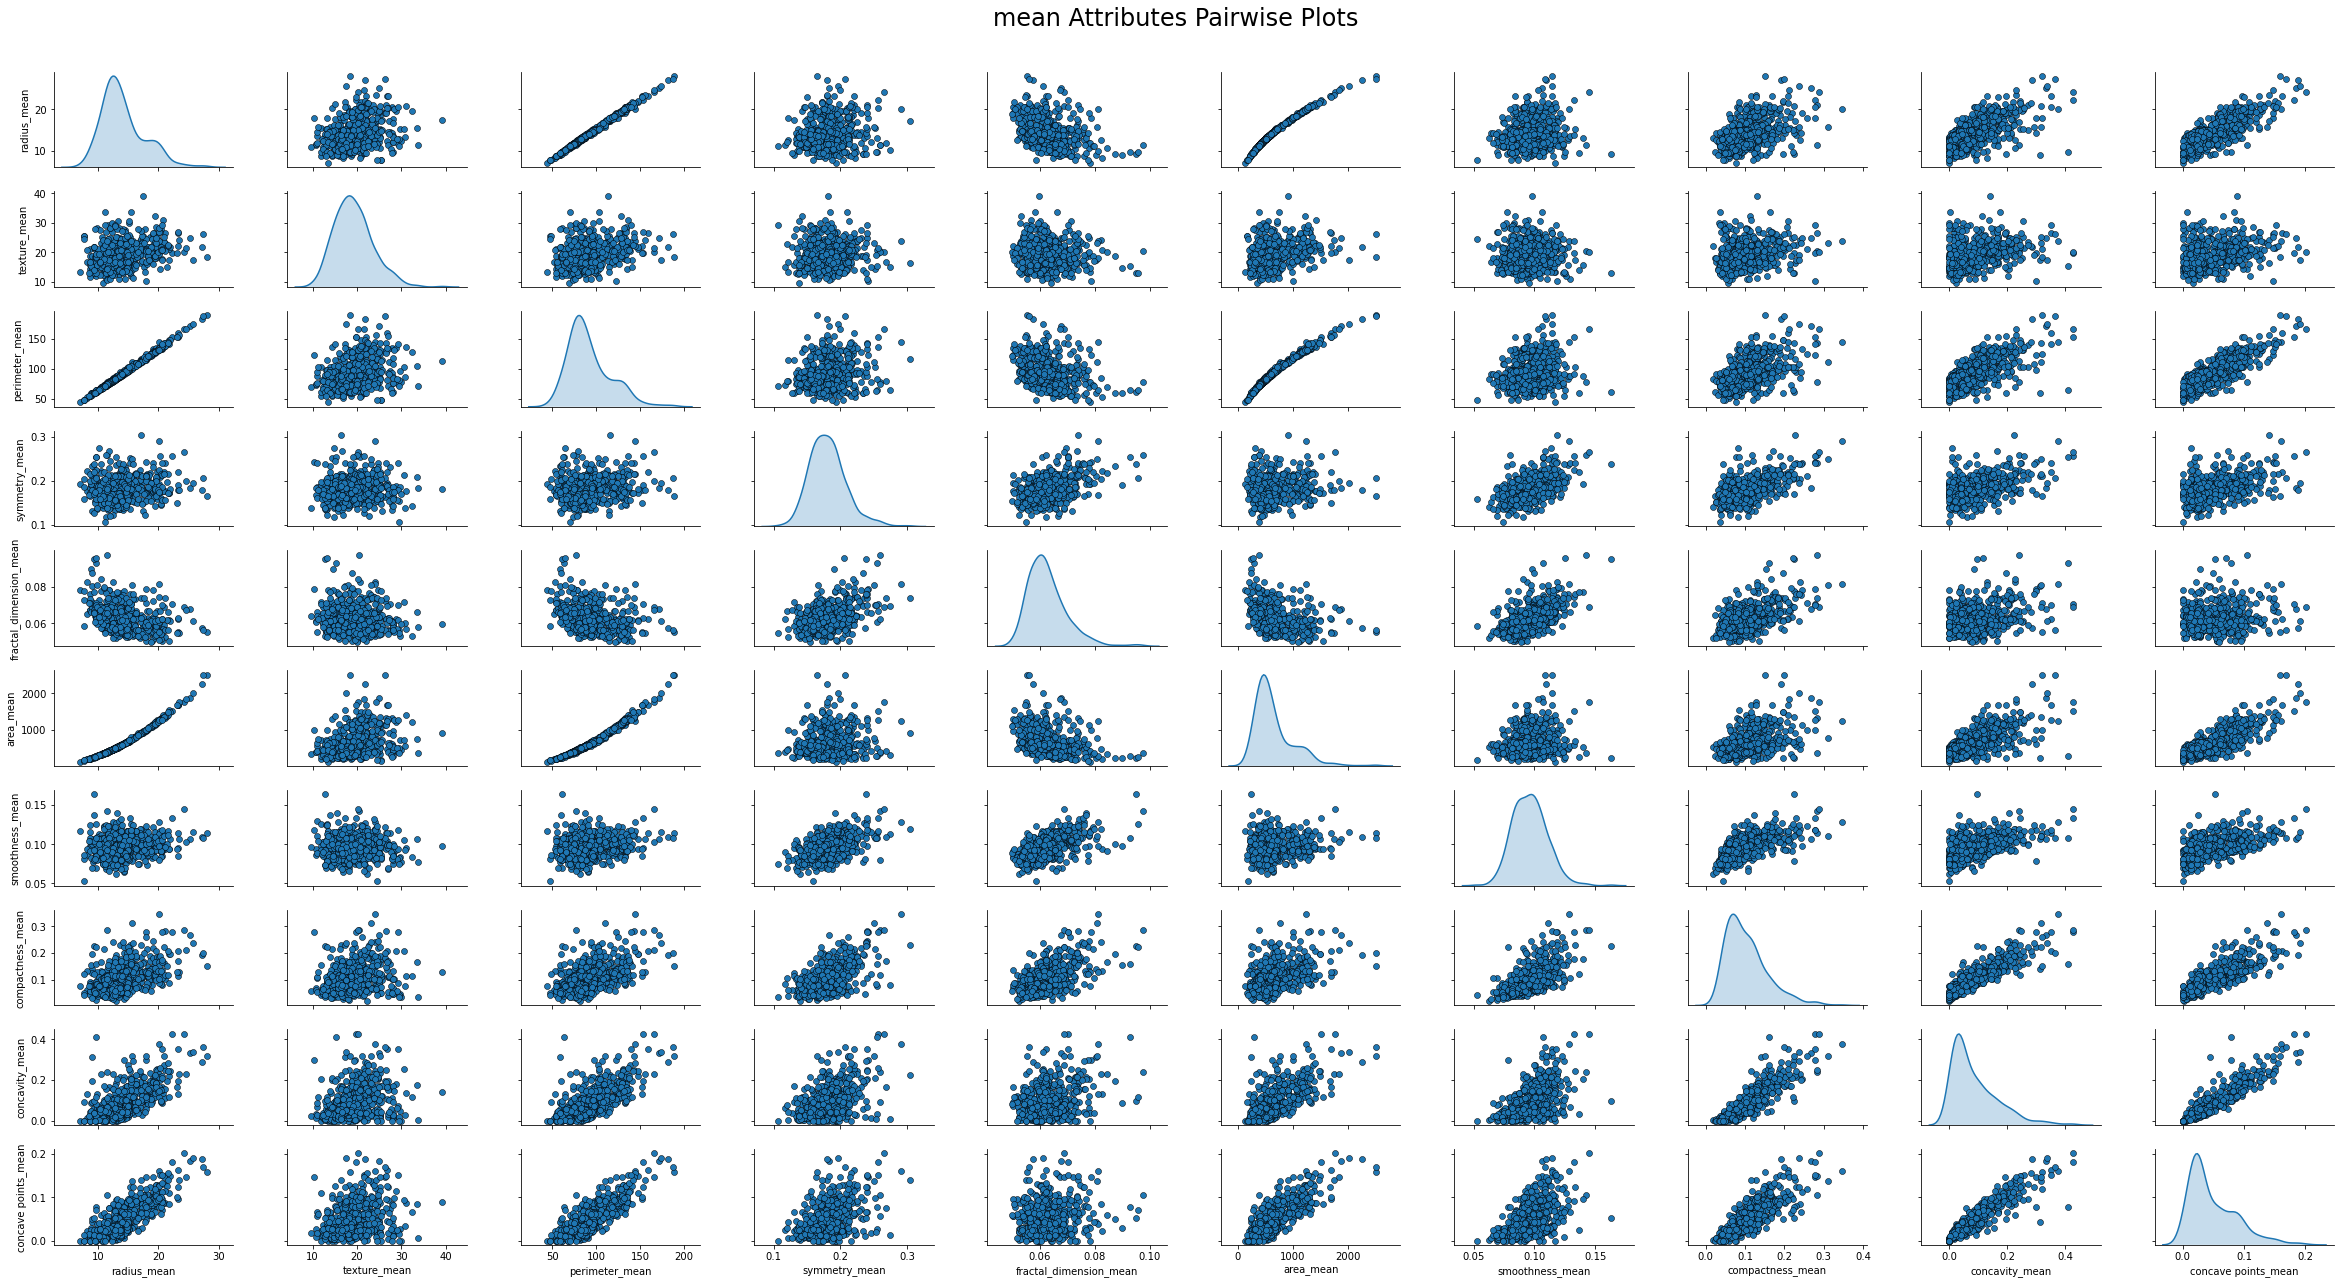

In [17]:
pp = sns.pairplot(sub, height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('mean Attributes Pairwise Plots', fontsize=24)

In [18]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

####  Splitting the dataset into the Training set and Test set 

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

Normalization

In [20]:
from sklearn.preprocessing import Normalizer
N_X = Normalizer()
x_train = N_X.fit_transform(x_train)
x_test = N_X.transform(x_test)

In [21]:
x_train.shape

(455, 30)

## ANN

In [22]:
classifier=Sequential()


In [23]:
classifier.add(Dense(output_dim=15,init='uniform',activation='relu',input_dim=30))
classifier.add(Dropout(0.2))

'''classifier.add(Dense(output_dim=15,init='uniform',activation='relu'))
classifier.add(Dropout(0.3))'''

classifier.add(Dense(output_dim=15,init='uniform',activation='relu'))
classifier.add(Dropout(0.2))

classifier.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))

classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

classifier.fit(x_train,y_train,batch_size=10, epochs=100)

C:\Users\nikil reddy\Ana\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=15, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.
C:\Users\nikil reddy\Ana\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=15, kernel_initializer="uniform")`
  import sys
C:\Users\nikil reddy\Ana\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/100
455/455 [==============================] - 1s 2ms/step - loss: 0.6908 - acc: 0.6264
Epoch 2/100
455/455 [==============================] - 0s 159us/step - loss: 0.6842 - acc: 0.6264
Epoch 3/100
455/455 [==============================] - 0s 249us/step - loss: 0.6747 - acc: 0.6264
Epoch 4/100
455/455 [==============================] - 0s 283us/step - loss: 0.6626 - acc: 0.6264
Epoch 5/100
455/455 [==============================] - 0s 261us/step - loss: 0.6568 - acc: 0.6264
Epoch 6/100
455/455 [==============================] - 0s 242us/step - loss: 0.6527 - acc: 0.6264
Epoch 7/100
455/455 [==============================] - 0s 256us/step - loss: 0.6553 - acc: 0.6264
Epoch 8/100
455/455 [==============================] - 0s 268us/step - loss: 0.6516 - acc: 0.6264
Epoch 9/100
455/455 [==============================] - 0s 288us/step - loss: 0.6465 - acc: 0.6264
Epoch 10/100
455/455 [==============================] - 0s 259us/step - loss: 0.6455 - acc: 0.6264
Epoch 11/100
455/455 

455/455 [==============================] - 0s 307us/step - loss: 0.2313 - acc: 0.9143
Epoch 84/100
455/455 [==============================] - 0s 323us/step - loss: 0.2457 - acc: 0.9033
Epoch 85/100
455/455 [==============================] - 0s 288us/step - loss: 0.2475 - acc: 0.9055
Epoch 86/100
455/455 [==============================] - 0s 318us/step - loss: 0.2482 - acc: 0.9011
Epoch 87/100
455/455 [==============================] - 0s 269us/step - loss: 0.2423 - acc: 0.9033
Epoch 88/100
455/455 [==============================] - 0s 279us/step - loss: 0.2561 - acc: 0.9033
Epoch 89/100
455/455 [==============================] - 0s 317us/step - loss: 0.2258 - acc: 0.9143
Epoch 90/100
455/455 [==============================] - 0s 316us/step - loss: 0.2503 - acc: 0.8989
Epoch 91/100
455/455 [==============================] - 0s 277us/step - loss: 0.2496 - acc: 0.9033
Epoch 92/100
455/455 [==============================] - 0s 327us/step - loss: 0.2564 - acc: 0.9099
Epoch 93/100
455/455 [=

Train: 0.919, Test: 0.912


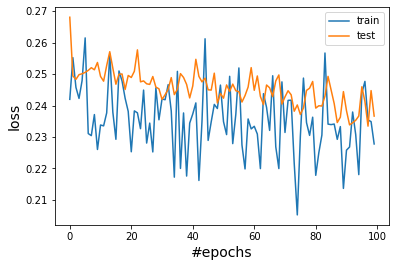

In [24]:
history = classifier.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=100, verbose=0)
# evaluate the model
_, train_acc = classifier.evaluate(x_train, y_train, verbose=0)
_, test_acc = classifier.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('#epochs',fontsize=14)
plt.ylabel('loss',fontsize=14)
plt.legend()
plt.show()


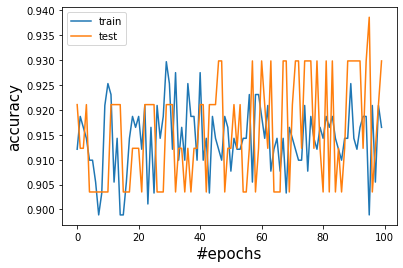

In [25]:
history = classifier.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=100, verbose=0)
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.xlabel('#epochs',fontsize=15)
plt.ylabel('accuracy',fontsize=15)
plt.legend()
plt.show()

In [26]:
y_pred= classifier.predict(x_test)
y_pred=(y_pred>0.5)

In [27]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [28]:
cm

array([[70,  2],
       [ 6, 36]], dtype=int64)

In [29]:
(70+36)/(70+36+6+2)

0.9298245614035088

In [30]:
# Evaluating the ANN
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))
    #classifier.add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'relu'))
    #classifier.add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10, n_jobs = -1)
mean = accuracies.mean()
variance = accuracies.std()

In [31]:
print("mean:{} variance:{}".format(mean,variance)) 

mean:0.9122222181679545 variance:0.02569853051896823


In [32]:
accuracies

array([0.89130435, 0.89130435, 0.89130433, 0.91304348, 0.91304346,
       0.91111111, 0.93333334, 0.97777777, 0.9111111 , 0.88888889])

In [33]:
# Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    
    classifier = Sequential()
    classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))
    #classifier.add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'relu'))
    #classifier.add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [10, 20],
              'epochs': [ 100, 50],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(x_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Epoch 1/100
409/409 [==============================] - 1s 2ms/step - loss: 0.6909 - acc: 0.6088
Epoch 2/100
409/409 [==============================] - 0s 188us/step - loss: 0.6843 - acc: 0.6259
Epoch 3/100
409/409 [==============================] - 0s 228us/step - loss: 0.6739 - acc: 0.6259
Epoch 4/100
409/409 [==============================] - 0s 212us/step - loss: 0.6635 - acc: 0.6259
Epoch 5/100
409/409 [==============================] - 0s 200us/step - loss: 0.6568 - acc: 0.6259
Epoch 6/100
409/409 [==============================] - 0s 193us/step - loss: 0.6518 - acc: 0.6259
Epoch 7/100
409/409 [==============================] - 0s 200us/step - loss: 0.6474 - acc: 0.6259
Epoch 8/100
409/409 [==============================] - 0s 226us/step - loss: 0.6423 - acc: 0.6259
Epoch 9/100
409/409 [==============================] - 0s 217us/step - loss: 0.6361 - acc: 0.6259
Epoch 10/100
409/409 [==============================] - 0s 196us/step - loss: 0.6289 - acc: 0.6259
Epoch 11/100
409/409 

409/409 [==============================] - 0s 299us/step - loss: 0.2006 - acc: 0.9095
Epoch 84/100
409/409 [==============================] - 0s 269us/step - loss: 0.2088 - acc: 0.9144
Epoch 85/100
409/409 [==============================] - 0s 280us/step - loss: 0.1982 - acc: 0.9120
Epoch 86/100
409/409 [==============================] - 0s 270us/step - loss: 0.1979 - acc: 0.9071
Epoch 87/100
409/409 [==============================] - 0s 274us/step - loss: 0.1997 - acc: 0.9193
Epoch 88/100
409/409 [==============================] - 0s 246us/step - loss: 0.1972 - acc: 0.9095
Epoch 89/100
409/409 [==============================] - 0s 304us/step - loss: 0.1992 - acc: 0.9120
Epoch 90/100
409/409 [==============================] - 0s 270us/step - loss: 0.1953 - acc: 0.9144
Epoch 91/100
409/409 [==============================] - 0s 239us/step - loss: 0.1963 - acc: 0.9120
Epoch 92/100
409/409 [==============================] - 0s 275us/step - loss: 0.1957 - acc: 0.9144
Epoch 93/100
409/409 [=

409/409 [==============================] - 0s 263us/step - loss: 0.2104 - acc: 0.9095
Epoch 66/100
409/409 [==============================] - 0s 259us/step - loss: 0.2114 - acc: 0.9144
Epoch 67/100
409/409 [==============================] - 0s 285us/step - loss: 0.2134 - acc: 0.9095
Epoch 68/100
409/409 [==============================] - 0s 245us/step - loss: 0.2111 - acc: 0.9120
Epoch 69/100
409/409 [==============================] - 0s 279us/step - loss: 0.2091 - acc: 0.9218
Epoch 70/100
409/409 [==============================] - 0s 293us/step - loss: 0.2089 - acc: 0.9144
Epoch 71/100
409/409 [==============================] - 0s 270us/step - loss: 0.2121 - acc: 0.9046
Epoch 72/100
409/409 [==============================] - 0s 276us/step - loss: 0.2084 - acc: 0.9144
Epoch 73/100
409/409 [==============================] - 0s 297us/step - loss: 0.2068 - acc: 0.9071
Epoch 74/100
409/409 [==============================] - 0s 271us/step - loss: 0.2066 - acc: 0.9193
Epoch 75/100
409/409 [=

Epoch 48/100
409/409 [==============================] - 0s 255us/step - loss: 0.2657 - acc: 0.9095
Epoch 49/100
409/409 [==============================] - 0s 268us/step - loss: 0.2553 - acc: 0.9120
Epoch 50/100
409/409 [==============================] - 0s 286us/step - loss: 0.2522 - acc: 0.9095
Epoch 51/100
409/409 [==============================] - 0s 291us/step - loss: 0.2479 - acc: 0.9120
Epoch 52/100
409/409 [==============================] - 0s 285us/step - loss: 0.2465 - acc: 0.9120
Epoch 53/100
409/409 [==============================] - 0s 249us/step - loss: 0.2412 - acc: 0.9095
Epoch 54/100
409/409 [==============================] - 0s 322us/step - loss: 0.2367 - acc: 0.9144
Epoch 55/100
409/409 [==============================] - 0s 252us/step - loss: 0.2365 - acc: 0.9071
Epoch 56/100
409/409 [==============================] - 0s 328us/step - loss: 0.2323 - acc: 0.9120
Epoch 57/100
409/409 [==============================] - 0s 277us/step - loss: 0.2311 - acc: 0.9144
Epoch 58/1

409/409 [==============================] - 0s 263us/step - loss: 0.3109 - acc: 0.9095
Epoch 31/100
409/409 [==============================] - 0s 297us/step - loss: 0.3032 - acc: 0.9095
Epoch 32/100
409/409 [==============================] - 0s 293us/step - loss: 0.2901 - acc: 0.9046
Epoch 33/100
409/409 [==============================] - 0s 252us/step - loss: 0.2823 - acc: 0.9022
Epoch 34/100
409/409 [==============================] - 0s 308us/step - loss: 0.2719 - acc: 0.9095
Epoch 35/100
409/409 [==============================] - 0s 272us/step - loss: 0.2605 - acc: 0.9095
Epoch 36/100
409/409 [==============================] - 0s 236us/step - loss: 0.2587 - acc: 0.9071
Epoch 37/100
409/409 [==============================] - 0s 276us/step - loss: 0.2562 - acc: 0.8949
Epoch 38/100
409/409 [==============================] - 0s 286us/step - loss: 0.2486 - acc: 0.9022
Epoch 39/100
409/409 [==============================] - 0s 251us/step - loss: 0.2436 - acc: 0.8998
Epoch 40/100
409/409 [=

Epoch 13/100
409/409 [==============================] - 0s 229us/step - loss: 0.6216 - acc: 0.6235
Epoch 14/100
409/409 [==============================] - 0s 250us/step - loss: 0.6133 - acc: 0.6235
Epoch 15/100
409/409 [==============================] - 0s 268us/step - loss: 0.6035 - acc: 0.6235
Epoch 16/100
409/409 [==============================] - 0s 293us/step - loss: 0.5929 - acc: 0.6235
Epoch 17/100
409/409 [==============================] - 0s 218us/step - loss: 0.5790 - acc: 0.6235
Epoch 18/100
409/409 [==============================] - 0s 240us/step - loss: 0.5640 - acc: 0.6235
Epoch 19/100
409/409 [==============================] - 0s 270us/step - loss: 0.5487 - acc: 0.6235
Epoch 20/100
409/409 [==============================] - 0s 268us/step - loss: 0.5341 - acc: 0.6235
Epoch 21/100
409/409 [==============================] - 0s 280us/step - loss: 0.5189 - acc: 0.6993
Epoch 22/100
409/409 [==============================] - 0s 297us/step - loss: 0.5025 - acc: 0.7262
Epoch 23/1

409/409 [==============================] - 0s 254us/step - loss: 0.2034 - acc: 0.9169
Epoch 96/100
409/409 [==============================] - 0s 333us/step - loss: 0.2045 - acc: 0.9193
Epoch 97/100
409/409 [==============================] - 0s 294us/step - loss: 0.2035 - acc: 0.9169
Epoch 98/100
409/409 [==============================] - 0s 305us/step - loss: 0.2058 - acc: 0.9144
Epoch 99/100
409/409 [==============================] - 0s 283us/step - loss: 0.2026 - acc: 0.9169
Epoch 100/100
409/409 [==============================] - 0s 294us/step - loss: 0.2049 - acc: 0.9120
Epoch 1/100
410/410 [==============================] - 1s 2ms/step - loss: 0.6910 - acc: 0.6293
Epoch 2/100
410/410 [==============================] - 0s 229us/step - loss: 0.6848 - acc: 0.6293
Epoch 3/100
410/410 [==============================] - 0s 199us/step - loss: 0.6739 - acc: 0.6293
Epoch 4/100
410/410 [==============================] - 0s 205us/step - loss: 0.6621 - acc: 0.6293
Epoch 5/100
410/410 [=======

Epoch 78/100
410/410 [==============================] - 0s 262us/step - loss: 0.2096 - acc: 0.9171
Epoch 79/100
410/410 [==============================] - 0s 281us/step - loss: 0.2092 - acc: 0.9146
Epoch 80/100
410/410 [==============================] - 0s 295us/step - loss: 0.2097 - acc: 0.9146
Epoch 81/100
410/410 [==============================] - 0s 248us/step - loss: 0.2121 - acc: 0.9098
Epoch 82/100
410/410 [==============================] - 0s 345us/step - loss: 0.2087 - acc: 0.9146
Epoch 83/100
410/410 [==============================] - 0s 298us/step - loss: 0.2055 - acc: 0.9098
Epoch 84/100
410/410 [==============================] - 0s 262us/step - loss: 0.2015 - acc: 0.9122
Epoch 85/100
410/410 [==============================] - 0s 297us/step - loss: 0.2138 - acc: 0.9171
Epoch 86/100
410/410 [==============================] - 0s 297us/step - loss: 0.2050 - acc: 0.9171
Epoch 87/100
410/410 [==============================] - 0s 312us/step - loss: 0.2143 - acc: 0.9098
Epoch 88/1

410/410 [==============================] - 0s 283us/step - loss: 0.2165 - acc: 0.9122
Epoch 61/100
410/410 [==============================] - 0s 289us/step - loss: 0.2147 - acc: 0.9098
Epoch 62/100
410/410 [==============================] - 0s 241us/step - loss: 0.2168 - acc: 0.9049
Epoch 63/100
410/410 [==============================] - 0s 292us/step - loss: 0.2146 - acc: 0.9073
Epoch 64/100
410/410 [==============================] - 0s 252us/step - loss: 0.2138 - acc: 0.9049
Epoch 65/100
410/410 [==============================] - 0s 253us/step - loss: 0.2147 - acc: 0.9146
Epoch 66/100
410/410 [==============================] - 0s 290us/step - loss: 0.2128 - acc: 0.9024
Epoch 67/100
410/410 [==============================] - 0s 241us/step - loss: 0.2110 - acc: 0.9098
Epoch 68/100
410/410 [==============================] - 0s 278us/step - loss: 0.2115 - acc: 0.9049
Epoch 69/100
410/410 [==============================] - 0s 233us/step - loss: 0.2129 - acc: 0.9073
Epoch 70/100
410/410 [=

410/410 [==============================] - 0s 294us/step - loss: 0.2405 - acc: 0.9000
Epoch 43/100
410/410 [==============================] - 0s 326us/step - loss: 0.2378 - acc: 0.9024
Epoch 44/100
410/410 [==============================] - 0s 329us/step - loss: 0.2423 - acc: 0.9024
Epoch 45/100
410/410 [==============================] - 0s 308us/step - loss: 0.2365 - acc: 0.9000
Epoch 46/100
410/410 [==============================] - 0s 282us/step - loss: 0.2364 - acc: 0.8976
Epoch 47/100
410/410 [==============================] - 0s 288us/step - loss: 0.2325 - acc: 0.9000
Epoch 48/100
410/410 [==============================] - 0s 276us/step - loss: 0.2329 - acc: 0.8927
Epoch 49/100
410/410 [==============================] - 0s 290us/step - loss: 0.2335 - acc: 0.9049
Epoch 50/100
410/410 [==============================] - 0s 311us/step - loss: 0.2269 - acc: 0.9000
Epoch 51/100
410/410 [==============================] - 0s 303us/step - loss: 0.2289 - acc: 0.8951
Epoch 52/100
410/410 [=

Epoch 25/100
410/410 [==============================] - 0s 310us/step - loss: 0.5267 - acc: 0.6317
Epoch 26/100
410/410 [==============================] - 0s 305us/step - loss: 0.5143 - acc: 0.6317
Epoch 27/100
410/410 [==============================] - 0s 306us/step - loss: 0.5046 - acc: 0.6317
Epoch 28/100
410/410 [==============================] - 0s 302us/step - loss: 0.4936 - acc: 0.7390
Epoch 29/100
410/410 [==============================] - 0s 309us/step - loss: 0.4845 - acc: 0.7634
Epoch 30/100
410/410 [==============================] - 0s 282us/step - loss: 0.4741 - acc: 0.7707
Epoch 31/100
410/410 [==============================] - 0s 297us/step - loss: 0.4663 - acc: 0.7780
Epoch 32/100
410/410 [==============================] - 0s 322us/step - loss: 0.4577 - acc: 0.8122
Epoch 33/100
410/410 [==============================] - 0s 318us/step - loss: 0.4489 - acc: 0.8073
Epoch 34/100
410/410 [==============================] - 0s 283us/step - loss: 0.4417 - acc: 0.8268
Epoch 35/1

410/410 [==============================] - 0s 198us/step - loss: 0.6499 - acc: 0.6268
Epoch 8/100
410/410 [==============================] - 0s 251us/step - loss: 0.6456 - acc: 0.6268
Epoch 9/100
410/410 [==============================] - 0s 252us/step - loss: 0.6422 - acc: 0.6268
Epoch 10/100
410/410 [==============================] - 0s 225us/step - loss: 0.6364 - acc: 0.6268
Epoch 11/100
410/410 [==============================] - 0s 190us/step - loss: 0.6302 - acc: 0.6268
Epoch 12/100
410/410 [==============================] - 0s 244us/step - loss: 0.6225 - acc: 0.6268
Epoch 13/100
410/410 [==============================] - 0s 241us/step - loss: 0.6134 - acc: 0.6268
Epoch 14/100
410/410 [==============================] - 0s 189us/step - loss: 0.6024 - acc: 0.6268
Epoch 15/100
410/410 [==============================] - 0s 235us/step - loss: 0.5898 - acc: 0.6268
Epoch 16/100
410/410 [==============================] - 0s 229us/step - loss: 0.5756 - acc: 0.6268
Epoch 17/100
410/410 [===

410/410 [==============================] - 0s 311us/step - loss: 0.2091 - acc: 0.9171
Epoch 90/100
410/410 [==============================] - 0s 327us/step - loss: 0.2068 - acc: 0.9146
Epoch 91/100
410/410 [==============================] - 0s 346us/step - loss: 0.2010 - acc: 0.9122
Epoch 92/100
410/410 [==============================] - 0s 293us/step - loss: 0.2038 - acc: 0.9195
Epoch 93/100
410/410 [==============================] - 0s 234us/step - loss: 0.2043 - acc: 0.9122
Epoch 94/100
410/410 [==============================] - 0s 285us/step - loss: 0.2007 - acc: 0.9122
Epoch 95/100
410/410 [==============================] - 0s 306us/step - loss: 0.2029 - acc: 0.9220
Epoch 96/100
410/410 [==============================] - 0s 327us/step - loss: 0.2014 - acc: 0.9146
Epoch 97/100
410/410 [==============================] - 0s 327us/step - loss: 0.2006 - acc: 0.9146
Epoch 98/100
410/410 [==============================] - 0s 299us/step - loss: 0.1987 - acc: 0.9171
Epoch 99/100
410/410 [=

Epoch 72/100
409/409 [==============================] - 0s 287us/step - loss: 0.2091 - acc: 0.9120
Epoch 73/100
409/409 [==============================] - 0s 252us/step - loss: 0.2089 - acc: 0.9120
Epoch 74/100
409/409 [==============================] - 0s 276us/step - loss: 0.2090 - acc: 0.9120
Epoch 75/100
409/409 [==============================] - 0s 293us/step - loss: 0.2088 - acc: 0.9144
Epoch 76/100
409/409 [==============================] - 0s 241us/step - loss: 0.2076 - acc: 0.9071
Epoch 77/100
409/409 [==============================] - 0s 267us/step - loss: 0.2060 - acc: 0.9095
Epoch 78/100
409/409 [==============================] - 0s 268us/step - loss: 0.2066 - acc: 0.9144
Epoch 79/100
409/409 [==============================] - 0s 241us/step - loss: 0.2055 - acc: 0.9120
Epoch 80/100
409/409 [==============================] - 0s 256us/step - loss: 0.2112 - acc: 0.9193
Epoch 81/100
409/409 [==============================] - 0s 290us/step - loss: 0.2046 - acc: 0.9095
Epoch 82/1

409/409 [==============================] - 0s 256us/step - loss: 0.2759 - acc: 0.9022
Epoch 55/100
409/409 [==============================] - 0s 232us/step - loss: 0.2707 - acc: 0.9095
Epoch 56/100
409/409 [==============================] - 0s 232us/step - loss: 0.2656 - acc: 0.9095
Epoch 57/100
409/409 [==============================] - 0s 232us/step - loss: 0.2626 - acc: 0.9071
Epoch 58/100
409/409 [==============================] - 0s 203us/step - loss: 0.2581 - acc: 0.9046
Epoch 59/100
409/409 [==============================] - 0s 265us/step - loss: 0.2539 - acc: 0.9095
Epoch 60/100
409/409 [==============================] - 0s 193us/step - loss: 0.2517 - acc: 0.8998
Epoch 61/100
409/409 [==============================] - 0s 216us/step - loss: 0.2513 - acc: 0.9095
Epoch 62/100
409/409 [==============================] - 0s 242us/step - loss: 0.2454 - acc: 0.9046
Epoch 63/100
409/409 [==============================] - 0s 221us/step - loss: 0.2436 - acc: 0.9046
Epoch 64/100
409/409 [=

409/409 [==============================] - 0s 306us/step - loss: 0.2794 - acc: 0.9095
Epoch 37/100
409/409 [==============================] - 0s 322us/step - loss: 0.2696 - acc: 0.9120
Epoch 38/100
409/409 [==============================] - 0s 292us/step - loss: 0.2692 - acc: 0.9071
Epoch 39/100
409/409 [==============================] - 0s 339us/step - loss: 0.2564 - acc: 0.9144
Epoch 40/100
409/409 [==============================] - 0s 295us/step - loss: 0.2521 - acc: 0.9169
Epoch 41/100
409/409 [==============================] - 0s 294us/step - loss: 0.2501 - acc: 0.9095
Epoch 42/100
409/409 [==============================] - 0s 291us/step - loss: 0.2435 - acc: 0.9095
Epoch 43/100
409/409 [==============================] - 0s 282us/step - loss: 0.2386 - acc: 0.9095
Epoch 44/100
409/409 [==============================] - 0s 205us/step - loss: 0.2354 - acc: 0.9095
Epoch 45/100
409/409 [==============================] - 0s 218us/step - loss: 0.2324 - acc: 0.9095
Epoch 46/100
409/409 [=

Epoch 19/100
409/409 [==============================] - 0s 258us/step - loss: 0.6232 - acc: 0.6284
Epoch 20/100
409/409 [==============================] - 0s 280us/step - loss: 0.6162 - acc: 0.6284
Epoch 21/100
409/409 [==============================] - 0s 277us/step - loss: 0.6094 - acc: 0.6284
Epoch 22/100
409/409 [==============================] - 0s 308us/step - loss: 0.5997 - acc: 0.6284
Epoch 23/100
409/409 [==============================] - 0s 288us/step - loss: 0.5862 - acc: 0.6284
Epoch 24/100
409/409 [==============================] - 0s 270us/step - loss: 0.5681 - acc: 0.6357
Epoch 25/100
409/409 [==============================] - 0s 263us/step - loss: 0.5468 - acc: 0.6699
Epoch 26/100
409/409 [==============================] - 0s 295us/step - loss: 0.5203 - acc: 0.7262
Epoch 27/100
409/409 [==============================] - 0s 277us/step - loss: 0.4910 - acc: 0.7824
Epoch 28/100
409/409 [==============================] - 0s 262us/step - loss: 0.4565 - acc: 0.8264
Epoch 29/1

409/409 [==============================] - 1s 3ms/step - loss: 0.6918 - acc: 0.6137
Epoch 2/100
409/409 [==============================] - 0s 247us/step - loss: 0.6885 - acc: 0.6235
Epoch 3/100
409/409 [==============================] - 0s 261us/step - loss: 0.6844 - acc: 0.6235
Epoch 4/100
409/409 [==============================] - 0s 272us/step - loss: 0.6782 - acc: 0.6235
Epoch 5/100
409/409 [==============================] - 0s 228us/step - loss: 0.6708 - acc: 0.6235
Epoch 6/100
409/409 [==============================] - 0s 253us/step - loss: 0.6639 - acc: 0.6235
Epoch 7/100
409/409 [==============================] - 0s 310us/step - loss: 0.6582 - acc: 0.6235
Epoch 8/100
409/409 [==============================] - 0s 299us/step - loss: 0.6524 - acc: 0.6235
Epoch 9/100
409/409 [==============================] - 0s 264us/step - loss: 0.6473 - acc: 0.6235
Epoch 10/100
409/409 [==============================] - 0s 306us/step - loss: 0.6417 - acc: 0.6235
Epoch 11/100
409/409 [===========

Epoch 84/100
409/409 [==============================] - 0s 289us/step - loss: 0.2090 - acc: 0.9120
Epoch 85/100
409/409 [==============================] - 0s 298us/step - loss: 0.2110 - acc: 0.9120
Epoch 86/100
409/409 [==============================] - 0s 346us/step - loss: 0.2101 - acc: 0.9071
Epoch 87/100
409/409 [==============================] - 0s 301us/step - loss: 0.2073 - acc: 0.9120
Epoch 88/100
409/409 [==============================] - 0s 321us/step - loss: 0.2079 - acc: 0.9095
Epoch 89/100
409/409 [==============================] - 0s 292us/step - loss: 0.2072 - acc: 0.9144
Epoch 90/100
409/409 [==============================] - 0s 322us/step - loss: 0.2068 - acc: 0.9120
Epoch 91/100
409/409 [==============================] - 0s 323us/step - loss: 0.2050 - acc: 0.9144
Epoch 92/100
409/409 [==============================] - 0s 284us/step - loss: 0.2040 - acc: 0.9169
Epoch 93/100
409/409 [==============================] - 0s 296us/step - loss: 0.2119 - acc: 0.9120
Epoch 94/1

410/410 [==============================] - 0s 307us/step - loss: 0.2322 - acc: 0.9000
Epoch 67/100
410/410 [==============================] - 0s 332us/step - loss: 0.2270 - acc: 0.9049
Epoch 68/100
410/410 [==============================] - 0s 287us/step - loss: 0.2268 - acc: 0.9098
Epoch 69/100
410/410 [==============================] - 0s 323us/step - loss: 0.2247 - acc: 0.9098
Epoch 70/100
410/410 [==============================] - 0s 259us/step - loss: 0.2238 - acc: 0.9122
Epoch 71/100
410/410 [==============================] - 0s 273us/step - loss: 0.2259 - acc: 0.9073
Epoch 72/100
410/410 [==============================] - 0s 252us/step - loss: 0.2245 - acc: 0.9195
Epoch 73/100
410/410 [==============================] - 0s 335us/step - loss: 0.2281 - acc: 0.9122
Epoch 74/100
410/410 [==============================] - 0s 295us/step - loss: 0.2201 - acc: 0.9073
Epoch 75/100
410/410 [==============================] - 0s 283us/step - loss: 0.2210 - acc: 0.9122
Epoch 76/100
410/410 [=

Epoch 49/100
410/410 [==============================] - 0s 251us/step - loss: 0.2335 - acc: 0.9073
Epoch 50/100
410/410 [==============================] - 0s 249us/step - loss: 0.2319 - acc: 0.9073
Epoch 51/100
410/410 [==============================] - 0s 258us/step - loss: 0.2307 - acc: 0.9024
Epoch 52/100
410/410 [==============================] - 0s 247us/step - loss: 0.2294 - acc: 0.8976
Epoch 53/100
410/410 [==============================] - 0s 251us/step - loss: 0.2275 - acc: 0.9000
Epoch 54/100
410/410 [==============================] - 0s 227us/step - loss: 0.2248 - acc: 0.9024
Epoch 55/100
410/410 [==============================] - 0s 252us/step - loss: 0.2231 - acc: 0.9122
Epoch 56/100
410/410 [==============================] - 0s 290us/step - loss: 0.2256 - acc: 0.9000
Epoch 57/100
410/410 [==============================] - 0s 250us/step - loss: 0.2249 - acc: 0.9024
Epoch 58/100
410/410 [==============================] - 0s 304us/step - loss: 0.2232 - acc: 0.9049
Epoch 59/1

410/410 [==============================] - 0s 307us/step - loss: 0.3362 - acc: 0.8976
Epoch 32/100
410/410 [==============================] - 0s 289us/step - loss: 0.3232 - acc: 0.9098
Epoch 33/100
410/410 [==============================] - 0s 294us/step - loss: 0.3071 - acc: 0.9000
Epoch 34/100
410/410 [==============================] - 0s 324us/step - loss: 0.2953 - acc: 0.9024
Epoch 35/100
410/410 [==============================] - 0s 282us/step - loss: 0.2851 - acc: 0.9049
Epoch 36/100
410/410 [==============================] - 0s 309us/step - loss: 0.2752 - acc: 0.9122
Epoch 37/100
410/410 [==============================] - 0s 285us/step - loss: 0.2704 - acc: 0.8976
Epoch 38/100
410/410 [==============================] - 0s 267us/step - loss: 0.2644 - acc: 0.9073
Epoch 39/100
410/410 [==============================] - 0s 321us/step - loss: 0.2569 - acc: 0.9024
Epoch 40/100
410/410 [==============================] - 0s 268us/step - loss: 0.2590 - acc: 0.8951
Epoch 41/100
410/410 [=

Epoch 14/100
410/410 [==============================] - 0s 272us/step - loss: 0.6376 - acc: 0.6317
Epoch 15/100
410/410 [==============================] - 0s 245us/step - loss: 0.6351 - acc: 0.6317
Epoch 16/100
410/410 [==============================] - 0s 242us/step - loss: 0.6320 - acc: 0.6317
Epoch 17/100
410/410 [==============================] - 0s 242us/step - loss: 0.6284 - acc: 0.6317
Epoch 18/100
410/410 [==============================] - 0s 267us/step - loss: 0.6247 - acc: 0.6317
Epoch 19/100
410/410 [==============================] - 0s 259us/step - loss: 0.6217 - acc: 0.6317
Epoch 20/100
410/410 [==============================] - 0s 224us/step - loss: 0.6157 - acc: 0.6317
Epoch 21/100
410/410 [==============================] - 0s 271us/step - loss: 0.6098 - acc: 0.6317
Epoch 22/100
410/410 [==============================] - 0s 245us/step - loss: 0.6036 - acc: 0.6317
Epoch 23/100
410/410 [==============================] - 0s 233us/step - loss: 0.5967 - acc: 0.6317
Epoch 24/1

410/410 [==============================] - 0s 248us/step - loss: 0.2160 - acc: 0.9000
Epoch 97/100
410/410 [==============================] - 0s 279us/step - loss: 0.2137 - acc: 0.9073
Epoch 98/100
410/410 [==============================] - 0s 250us/step - loss: 0.2150 - acc: 0.9098
Epoch 99/100
410/410 [==============================] - 0s 252us/step - loss: 0.2162 - acc: 0.9073
Epoch 100/100
410/410 [==============================] - 0s 255us/step - loss: 0.2129 - acc: 0.9073
Epoch 1/100
410/410 [==============================] - 2s 4ms/step - loss: 0.6915 - acc: 0.6122
Epoch 2/100
410/410 [==============================] - 0s 250us/step - loss: 0.6877 - acc: 0.6268
Epoch 3/100
410/410 [==============================] - 0s 248us/step - loss: 0.6832 - acc: 0.6268
Epoch 4/100
410/410 [==============================] - 0s 273us/step - loss: 0.6776 - acc: 0.6268
Epoch 5/100
410/410 [==============================] - 0s 256us/step - loss: 0.6702 - acc: 0.6268
Epoch 6/100
410/410 [========

Epoch 79/100
410/410 [==============================] - 0s 152us/step - loss: 0.2062 - acc: 0.9122
Epoch 80/100
410/410 [==============================] - 0s 152us/step - loss: 0.2063 - acc: 0.9122
Epoch 81/100
410/410 [==============================] - 0s 152us/step - loss: 0.2046 - acc: 0.9195
Epoch 82/100
410/410 [==============================] - 0s 152us/step - loss: 0.2100 - acc: 0.9122
Epoch 83/100
410/410 [==============================] - 0s 161us/step - loss: 0.2080 - acc: 0.9122
Epoch 84/100
410/410 [==============================] - 0s 151us/step - loss: 0.2017 - acc: 0.9195
Epoch 85/100
410/410 [==============================] - 0s 144us/step - loss: 0.2065 - acc: 0.9244
Epoch 86/100
410/410 [==============================] - 0s 114us/step - loss: 0.2055 - acc: 0.9098
Epoch 87/100
410/410 [==============================] - 0s 114us/step - loss: 0.2053 - acc: 0.9146
Epoch 88/100
410/410 [==============================] - 0s 152us/step - loss: 0.2060 - acc: 0.9171
Epoch 89/1

409/409 [==============================] - 0s 221us/step - loss: 0.6442 - acc: 0.6210
Epoch 13/50
409/409 [==============================] - 0s 249us/step - loss: 0.6395 - acc: 0.6210
Epoch 14/50
409/409 [==============================] - 0s 234us/step - loss: 0.6338 - acc: 0.6210
Epoch 15/50
409/409 [==============================] - 0s 250us/step - loss: 0.6274 - acc: 0.6210
Epoch 16/50
409/409 [==============================] - 0s 278us/step - loss: 0.6194 - acc: 0.6210
Epoch 17/50
409/409 [==============================] - 0s 246us/step - loss: 0.6099 - acc: 0.6210
Epoch 18/50
409/409 [==============================] - 0s 247us/step - loss: 0.5995 - acc: 0.6210
Epoch 19/50
409/409 [==============================] - 0s 268us/step - loss: 0.5856 - acc: 0.6235
Epoch 20/50
409/409 [==============================] - 0s 233us/step - loss: 0.5707 - acc: 0.6650
Epoch 21/50
409/409 [==============================] - 0s 348us/step - loss: 0.5529 - acc: 0.6748
Epoch 22/50
409/409 [===========

409/409 [==============================] - 0s 265us/step - loss: 0.2112 - acc: 0.9120
Epoch 46/50
409/409 [==============================] - 0s 279us/step - loss: 0.2065 - acc: 0.9120
Epoch 47/50
409/409 [==============================] - 0s 240us/step - loss: 0.2058 - acc: 0.9242
Epoch 48/50
409/409 [==============================] - 0s 238us/step - loss: 0.2110 - acc: 0.9071
Epoch 49/50
409/409 [==============================] - 0s 270us/step - loss: 0.2039 - acc: 0.9120
Epoch 50/50
409/409 [==============================] - 0s 269us/step - loss: 0.2069 - acc: 0.9095
Epoch 1/50
409/409 [==============================] - 2s 5ms/step - loss: 0.6913 - acc: 0.6186
Epoch 2/50
409/409 [==============================] - 0s 310us/step - loss: 0.6859 - acc: 0.6284
Epoch 3/50
409/409 [==============================] - 0s 279us/step - loss: 0.6773 - acc: 0.6284
Epoch 4/50
409/409 [==============================] - 0s 225us/step - loss: 0.6673 - acc: 0.6284
Epoch 5/50
409/409 [==================

Epoch 29/50
409/409 [==============================] - 0s 289us/step - loss: 0.3034 - acc: 0.8973
Epoch 30/50
409/409 [==============================] - 0s 291us/step - loss: 0.2942 - acc: 0.9046
Epoch 31/50
409/409 [==============================] - 0s 360us/step - loss: 0.2855 - acc: 0.8998
Epoch 32/50
409/409 [==============================] - 0s 307us/step - loss: 0.2820 - acc: 0.9046
Epoch 33/50
409/409 [==============================] - 0s 272us/step - loss: 0.2719 - acc: 0.9071
Epoch 34/50
409/409 [==============================] - 0s 352us/step - loss: 0.2674 - acc: 0.9095
Epoch 35/50
409/409 [==============================] - 0s 309us/step - loss: 0.2615 - acc: 0.9071
Epoch 36/50
409/409 [==============================] - 0s 343us/step - loss: 0.2558 - acc: 0.9046
Epoch 37/50
409/409 [==============================] - 0s 336us/step - loss: 0.2510 - acc: 0.9046
Epoch 38/50
409/409 [==============================] - 0s 332us/step - loss: 0.2508 - acc: 0.9046
Epoch 39/50
409/409 

410/410 [==============================] - 0s 335us/step - loss: 0.6411 - acc: 0.6268
Epoch 13/50
410/410 [==============================] - 0s 329us/step - loss: 0.6375 - acc: 0.6268
Epoch 14/50
410/410 [==============================] - 0s 297us/step - loss: 0.6329 - acc: 0.6268
Epoch 15/50
410/410 [==============================] - 0s 327us/step - loss: 0.6268 - acc: 0.6268
Epoch 16/50
410/410 [==============================] - 0s 347us/step - loss: 0.6187 - acc: 0.6268
Epoch 17/50
410/410 [==============================] - 0s 298us/step - loss: 0.6099 - acc: 0.6268
Epoch 18/50
410/410 [==============================] - 0s 329us/step - loss: 0.5977 - acc: 0.6268
Epoch 19/50
410/410 [==============================] - 0s 334us/step - loss: 0.5834 - acc: 0.6341
Epoch 20/50
410/410 [==============================] - 0s 302us/step - loss: 0.5698 - acc: 0.6390
Epoch 21/50
410/410 [==============================] - 0s 298us/step - loss: 0.5505 - acc: 0.7244
Epoch 22/50
410/410 [===========

410/410 [==============================] - 0s 286us/step - loss: 0.2513 - acc: 0.9000
Epoch 46/50
410/410 [==============================] - 0s 260us/step - loss: 0.2495 - acc: 0.8951
Epoch 47/50
410/410 [==============================] - 0s 255us/step - loss: 0.2463 - acc: 0.8951
Epoch 48/50
410/410 [==============================] - 0s 297us/step - loss: 0.2476 - acc: 0.9024
Epoch 49/50
410/410 [==============================] - 0s 240us/step - loss: 0.2408 - acc: 0.9024
Epoch 50/50
410/410 [==============================] - 0s 261us/step - loss: 0.2367 - acc: 0.9049
Epoch 1/50
410/410 [==============================] - 2s 5ms/step - loss: 0.6910 - acc: 0.6122
Epoch 2/50
410/410 [==============================] - 0s 263us/step - loss: 0.6841 - acc: 0.6317
Epoch 3/50
410/410 [==============================] - 0s 294us/step - loss: 0.6717 - acc: 0.6317
Epoch 4/50
410/410 [==============================] - 0s 266us/step - loss: 0.6583 - acc: 0.6317
Epoch 5/50
410/410 [==================

Epoch 29/50
410/410 [==============================] - 0s 274us/step - loss: 0.6114 - acc: 0.6268
Epoch 30/50
410/410 [==============================] - 0s 253us/step - loss: 0.6064 - acc: 0.6268
Epoch 31/50
410/410 [==============================] - 0s 293us/step - loss: 0.6002 - acc: 0.6268
Epoch 32/50
410/410 [==============================] - 0s 277us/step - loss: 0.5942 - acc: 0.6268
Epoch 33/50
410/410 [==============================] - 0s 276us/step - loss: 0.5861 - acc: 0.6268
Epoch 34/50
410/410 [==============================] - 0s 269us/step - loss: 0.5782 - acc: 0.6317
Epoch 35/50
410/410 [==============================] - 0s 271us/step - loss: 0.5659 - acc: 0.6390
Epoch 36/50
410/410 [==============================] - 0s 275us/step - loss: 0.5496 - acc: 0.6683
Epoch 37/50
410/410 [==============================] - 0s 242us/step - loss: 0.5292 - acc: 0.6951
Epoch 38/50
410/410 [==============================] - 0s 289us/step - loss: 0.5071 - acc: 0.7683
Epoch 39/50
410/410 

409/409 [==============================] - 0s 260us/step - loss: 0.6511 - acc: 0.6210
Epoch 13/50
409/409 [==============================] - 0s 299us/step - loss: 0.6495 - acc: 0.6210
Epoch 14/50
409/409 [==============================] - 0s 291us/step - loss: 0.6480 - acc: 0.6210
Epoch 15/50
409/409 [==============================] - 0s 271us/step - loss: 0.6464 - acc: 0.6210
Epoch 16/50
409/409 [==============================] - 0s 301us/step - loss: 0.6446 - acc: 0.6210
Epoch 17/50
409/409 [==============================] - 0s 289us/step - loss: 0.6428 - acc: 0.6210
Epoch 18/50
409/409 [==============================] - 0s 274us/step - loss: 0.6402 - acc: 0.6210
Epoch 19/50
409/409 [==============================] - 0s 279us/step - loss: 0.6374 - acc: 0.6210
Epoch 20/50
409/409 [==============================] - 0s 283us/step - loss: 0.6343 - acc: 0.6210
Epoch 21/50
409/409 [==============================] - 0s 253us/step - loss: 0.6306 - acc: 0.6210
Epoch 22/50
409/409 [===========

409/409 [==============================] - 0s 290us/step - loss: 0.3454 - acc: 0.9071
Epoch 46/50
409/409 [==============================] - 0s 291us/step - loss: 0.3395 - acc: 0.9144
Epoch 47/50
409/409 [==============================] - 0s 291us/step - loss: 0.3387 - acc: 0.9095
Epoch 48/50
409/409 [==============================] - 0s 275us/step - loss: 0.3284 - acc: 0.9120
Epoch 49/50
409/409 [==============================] - 0s 287us/step - loss: 0.3285 - acc: 0.9193
Epoch 50/50
409/409 [==============================] - 0s 283us/step - loss: 0.3220 - acc: 0.9120
Epoch 1/50
409/409 [==============================] - 2s 6ms/step - loss: 0.6911 - acc: 0.6284
Epoch 2/50
409/409 [==============================] - 0s 284us/step - loss: 0.6848 - acc: 0.6284
Epoch 3/50
409/409 [==============================] - 0s 282us/step - loss: 0.6750 - acc: 0.6284
Epoch 4/50
409/409 [==============================] - 0s 293us/step - loss: 0.6631 - acc: 0.6284
Epoch 5/50
409/409 [==================

Epoch 29/50
409/409 [==============================] - 0s 282us/step - loss: 0.4119 - acc: 0.8606
Epoch 30/50
409/409 [==============================] - 0s 287us/step - loss: 0.3957 - acc: 0.8680
Epoch 31/50
409/409 [==============================] - 0s 263us/step - loss: 0.3786 - acc: 0.8778
Epoch 32/50
409/409 [==============================] - 0s 325us/step - loss: 0.3654 - acc: 0.8949
Epoch 33/50
409/409 [==============================] - 0s 289us/step - loss: 0.3546 - acc: 0.8900
Epoch 34/50
409/409 [==============================] - 0s 275us/step - loss: 0.3381 - acc: 0.8998
Epoch 35/50
409/409 [==============================] - 0s 278us/step - loss: 0.3288 - acc: 0.8973
Epoch 36/50
409/409 [==============================] - 0s 305us/step - loss: 0.3210 - acc: 0.9022
Epoch 37/50
409/409 [==============================] - 0s 305us/step - loss: 0.3086 - acc: 0.9022
Epoch 38/50
409/409 [==============================] - 0s 296us/step - loss: 0.3018 - acc: 0.8973
Epoch 39/50
409/409 

410/410 [==============================] - ETA: 0s - loss: 0.6479 - acc: 0.629 - 0s 325us/step - loss: 0.6487 - acc: 0.6268
Epoch 13/50
410/410 [==============================] - 0s 249us/step - loss: 0.6467 - acc: 0.6268
Epoch 14/50
410/410 [==============================] - 0s 303us/step - loss: 0.6459 - acc: 0.6268
Epoch 15/50
410/410 [==============================] - 0s 283us/step - loss: 0.6439 - acc: 0.6268
Epoch 16/50
410/410 [==============================] - 0s 326us/step - loss: 0.6424 - acc: 0.6268
Epoch 17/50
410/410 [==============================] - 0s 385us/step - loss: 0.6402 - acc: 0.6268
Epoch 18/50
410/410 [==============================] - 0s 523us/step - loss: 0.6383 - acc: 0.6268
Epoch 19/50
410/410 [==============================] - 0s 624us/step - loss: 0.6362 - acc: 0.6268
Epoch 20/50
410/410 [==============================] - 0s 557us/step - loss: 0.6330 - acc: 0.6268
Epoch 21/50
410/410 [==============================] - 0s 606us/step - loss: 0.6306 - acc: 0

410/410 [==============================] - 0s 310us/step - loss: 0.2287 - acc: 0.9000
Epoch 46/50
410/410 [==============================] - 0s 275us/step - loss: 0.2332 - acc: 0.9000
Epoch 47/50
410/410 [==============================] - 0s 317us/step - loss: 0.2300 - acc: 0.9024
Epoch 48/50
410/410 [==============================] - 0s 290us/step - loss: 0.2325 - acc: 0.9073
Epoch 49/50
410/410 [==============================] - 0s 314us/step - loss: 0.2221 - acc: 0.9098
Epoch 50/50
410/410 [==============================] - 0s 305us/step - loss: 0.2293 - acc: 0.9000
Epoch 1/50
410/410 [==============================] - 3s 7ms/step - loss: 0.6911 - acc: 0.6317
Epoch 2/50
410/410 [==============================] - 0s 304us/step - loss: 0.6836 - acc: 0.6317
Epoch 3/50
410/410 [==============================] - 0s 324us/step - loss: 0.6712 - acc: 0.6317
Epoch 4/50
410/410 [==============================] - 0s 318us/step - loss: 0.6581 - acc: 0.6317
Epoch 5/50
410/410 [==================

Epoch 29/50
410/410 [==============================] - 0s 455us/step - loss: 0.4442 - acc: 0.8146
Epoch 30/50
410/410 [==============================] - 0s 647us/step - loss: 0.4286 - acc: 0.8488 0s - loss: 0.4332 - acc: 0.84
Epoch 31/50
410/410 [==============================] - 0s 495us/step - loss: 0.4119 - acc: 0.8585
Epoch 32/50
410/410 [==============================] - 0s 475us/step - loss: 0.3941 - acc: 0.8780
Epoch 33/50
410/410 [==============================] - 0s 493us/step - loss: 0.3789 - acc: 0.8732
Epoch 34/50
410/410 [==============================] - 0s 464us/step - loss: 0.3637 - acc: 0.8951
Epoch 35/50
410/410 [==============================] - 0s 627us/step - loss: 0.3489 - acc: 0.9122
Epoch 36/50
410/410 [==============================] - 0s 533us/step - loss: 0.3405 - acc: 0.9073
Epoch 37/50
410/410 [==============================] - 0s 445us/step - loss: 0.3278 - acc: 0.9049
Epoch 38/50
410/410 [==============================] - 0s 419us/step - loss: 0.3158 - ac

409/409 [==============================] - 0s 254us/step - loss: 0.2410 - acc: 0.9022
Epoch 62/100
409/409 [==============================] - 0s 253us/step - loss: 0.2379 - acc: 0.9046
Epoch 63/100
409/409 [==============================] - 0s 233us/step - loss: 0.2341 - acc: 0.9046
Epoch 64/100
409/409 [==============================] - 0s 208us/step - loss: 0.2366 - acc: 0.9095
Epoch 65/100
409/409 [==============================] - 0s 264us/step - loss: 0.2333 - acc: 0.9120
Epoch 66/100
409/409 [==============================] - 0s 197us/step - loss: 0.2283 - acc: 0.9071
Epoch 67/100
409/409 [==============================] - 0s 261us/step - loss: 0.2274 - acc: 0.9120
Epoch 68/100
409/409 [==============================] - 0s 213us/step - loss: 0.2289 - acc: 0.8998
Epoch 69/100
409/409 [==============================] - 0s 254us/step - loss: 0.2255 - acc: 0.9071
Epoch 70/100
409/409 [==============================] - 0s 183us/step - loss: 0.2222 - acc: 0.9071
Epoch 71/100
409/409 [=

Epoch 44/100
409/409 [==============================] - 0s 261us/step - loss: 0.3426 - acc: 0.9095
Epoch 45/100
409/409 [==============================] - 0s 338us/step - loss: 0.3322 - acc: 0.9144
Epoch 46/100
409/409 [==============================] - 0s 200us/step - loss: 0.3236 - acc: 0.9120
Epoch 47/100
409/409 [==============================] - 0s 223us/step - loss: 0.3147 - acc: 0.9095
Epoch 48/100
409/409 [==============================] - 0s 232us/step - loss: 0.3074 - acc: 0.9095
Epoch 49/100
409/409 [==============================] - 0s 180us/step - loss: 0.2997 - acc: 0.9120
Epoch 50/100
409/409 [==============================] - 0s 137us/step - loss: 0.2945 - acc: 0.9022
Epoch 51/100
409/409 [==============================] - 0s 155us/step - loss: 0.2905 - acc: 0.9095
Epoch 52/100
409/409 [==============================] - 0s 161us/step - loss: 0.2852 - acc: 0.9022
Epoch 53/100
409/409 [==============================] - 0s 151us/step - loss: 0.2768 - acc: 0.9071
Epoch 54/1

409/409 [==============================] - 0s 302us/step - loss: 0.5128 - acc: 0.7066
Epoch 27/100
409/409 [==============================] - 0s 323us/step - loss: 0.4949 - acc: 0.7384
Epoch 28/100
409/409 [==============================] - 0s 347us/step - loss: 0.4783 - acc: 0.7579
Epoch 29/100
409/409 [==============================] - 0s 301us/step - loss: 0.4623 - acc: 0.8215
Epoch 30/100
409/409 [==============================] - 0s 306us/step - loss: 0.4448 - acc: 0.8362
Epoch 31/100
409/409 [==============================] - 0s 298us/step - loss: 0.4292 - acc: 0.8484
Epoch 32/100
409/409 [==============================] - 0s 300us/step - loss: 0.4141 - acc: 0.8606
Epoch 33/100
409/409 [==============================] - 0s 322us/step - loss: 0.4013 - acc: 0.8557
Epoch 34/100
409/409 [==============================] - 0s 249us/step - loss: 0.3865 - acc: 0.8826
Epoch 35/100
409/409 [==============================] - 0s 281us/step - loss: 0.3718 - acc: 0.8826
Epoch 36/100
409/409 [=

Epoch 9/100
409/409 [==============================] - 0s 378us/step - loss: 0.6485 - acc: 0.6284
Epoch 10/100
409/409 [==============================] - 0s 364us/step - loss: 0.6457 - acc: 0.6284
Epoch 11/100
409/409 [==============================] - 0s 294us/step - loss: 0.6437 - acc: 0.6284
Epoch 12/100
409/409 [==============================] - 0s 181us/step - loss: 0.6388 - acc: 0.6284
Epoch 13/100
409/409 [==============================] - 0s 232us/step - loss: 0.6352 - acc: 0.6284
Epoch 14/100
409/409 [==============================] - 0s 222us/step - loss: 0.6324 - acc: 0.6284
Epoch 15/100
409/409 [==============================] - 0s 216us/step - loss: 0.6260 - acc: 0.6284
Epoch 16/100
409/409 [==============================] - 0s 182us/step - loss: 0.6200 - acc: 0.6284
Epoch 17/100
409/409 [==============================] - 0s 193us/step - loss: 0.6127 - acc: 0.6284
Epoch 18/100
409/409 [==============================] - 0s 229us/step - loss: 0.6049 - acc: 0.6284
Epoch 19/10

409/409 [==============================] - 0s 228us/step - loss: 0.2776 - acc: 0.9144
Epoch 92/100
409/409 [==============================] - 0s 241us/step - loss: 0.2766 - acc: 0.9169
Epoch 93/100
409/409 [==============================] - 0s 216us/step - loss: 0.2761 - acc: 0.9120
Epoch 94/100
409/409 [==============================] - 0s 228us/step - loss: 0.2725 - acc: 0.9120
Epoch 95/100
409/409 [==============================] - 0s 253us/step - loss: 0.2707 - acc: 0.9169
Epoch 96/100
409/409 [==============================] - 0s 217us/step - loss: 0.2711 - acc: 0.9218
Epoch 97/100
409/409 [==============================] - 0s 199us/step - loss: 0.2680 - acc: 0.9144
Epoch 98/100
409/409 [==============================] - 0s 186us/step - loss: 0.2668 - acc: 0.9169
Epoch 99/100
409/409 [==============================] - 0s 241us/step - loss: 0.2666 - acc: 0.9193
Epoch 100/100
409/409 [==============================] - 0s 214us/step - loss: 0.2645 - acc: 0.9218
Epoch 1/100
409/409 [=

Epoch 74/100
409/409 [==============================] - 0s 318us/step - loss: 0.2155 - acc: 0.9071
Epoch 75/100
409/409 [==============================] - 0s 299us/step - loss: 0.2141 - acc: 0.9144
Epoch 76/100
409/409 [==============================] - 0s 291us/step - loss: 0.2130 - acc: 0.9120
Epoch 77/100
409/409 [==============================] - 0s 302us/step - loss: 0.2127 - acc: 0.9169
Epoch 78/100
409/409 [==============================] - 0s 318us/step - loss: 0.2115 - acc: 0.9120
Epoch 79/100
409/409 [==============================] - 0s 337us/step - loss: 0.2109 - acc: 0.9120
Epoch 80/100
409/409 [==============================] - 0s 315us/step - loss: 0.2110 - acc: 0.9120
Epoch 81/100
409/409 [==============================] - 0s 323us/step - loss: 0.2130 - acc: 0.9120
Epoch 82/100
409/409 [==============================] - 0s 271us/step - loss: 0.2121 - acc: 0.9095
Epoch 83/100
409/409 [==============================] - 0s 262us/step - loss: 0.2099 - acc: 0.9120
Epoch 84/1

410/410 [==============================] - 0s 266us/step - loss: 0.2556 - acc: 0.9049
Epoch 57/100
410/410 [==============================] - 0s 230us/step - loss: 0.2524 - acc: 0.9122
Epoch 58/100
410/410 [==============================] - 0s 228us/step - loss: 0.2494 - acc: 0.9122
Epoch 59/100
410/410 [==============================] - 0s 248us/step - loss: 0.2460 - acc: 0.9098
Epoch 60/100
410/410 [==============================] - 0s 261us/step - loss: 0.2453 - acc: 0.9073
Epoch 61/100
410/410 [==============================] - 0s 256us/step - loss: 0.2437 - acc: 0.9146
Epoch 62/100
410/410 [==============================] - 0s 271us/step - loss: 0.2404 - acc: 0.9049
Epoch 63/100
410/410 [==============================] - 0s 255us/step - loss: 0.2376 - acc: 0.9171
Epoch 64/100
410/410 [==============================] - 0s 279us/step - loss: 0.2359 - acc: 0.9049
Epoch 65/100
410/410 [==============================] - 0s 202us/step - loss: 0.2337 - acc: 0.9073
Epoch 66/100
410/410 [=

Epoch 39/100
410/410 [==============================] - 0s 164us/step - loss: 0.4638 - acc: 0.8488
Epoch 40/100
410/410 [==============================] - 0s 177us/step - loss: 0.4410 - acc: 0.8902
Epoch 41/100
410/410 [==============================] - 0s 168us/step - loss: 0.4195 - acc: 0.8732
Epoch 42/100
410/410 [==============================] - 0s 180us/step - loss: 0.3977 - acc: 0.9049
Epoch 43/100
410/410 [==============================] - 0s 168us/step - loss: 0.3793 - acc: 0.9049
Epoch 44/100
410/410 [==============================] - 0s 190us/step - loss: 0.3624 - acc: 0.8951
Epoch 45/100
410/410 [==============================] - 0s 169us/step - loss: 0.3504 - acc: 0.8976
Epoch 46/100
410/410 [==============================] - 0s 177us/step - loss: 0.3308 - acc: 0.9073
Epoch 47/100
410/410 [==============================] - 0s 176us/step - loss: 0.3203 - acc: 0.9073
Epoch 48/100
410/410 [==============================] - 0s 188us/step - loss: 0.3111 - acc: 0.9146
Epoch 49/1

410/410 [==============================] - 0s 199us/step - loss: 0.6302 - acc: 0.6195
Epoch 22/100
410/410 [==============================] - 0s 200us/step - loss: 0.6263 - acc: 0.6195
Epoch 23/100
410/410 [==============================] - 0s 210us/step - loss: 0.6217 - acc: 0.6195
Epoch 24/100
410/410 [==============================] - 0s 208us/step - loss: 0.6159 - acc: 0.6195
Epoch 25/100
410/410 [==============================] - 0s 210us/step - loss: 0.6101 - acc: 0.6195
Epoch 26/100
410/410 [==============================] - 0s 246us/step - loss: 0.6034 - acc: 0.6195
Epoch 27/100
410/410 [==============================] - 0s 286us/step - loss: 0.5952 - acc: 0.6195
Epoch 28/100
410/410 [==============================] - 0s 236us/step - loss: 0.5862 - acc: 0.6195
Epoch 29/100
410/410 [==============================] - 0s 272us/step - loss: 0.5770 - acc: 0.6195
Epoch 30/100
410/410 [==============================] - 0s 399us/step - loss: 0.5673 - acc: 0.6195
Epoch 31/100
410/410 [=

410/410 [==============================] - 0s 168us/step - loss: 0.6845 - acc: 0.6317
Epoch 4/100
410/410 [==============================] - 0s 268us/step - loss: 0.6776 - acc: 0.6317
Epoch 5/100
410/410 [==============================] - 0s 311us/step - loss: 0.6688 - acc: 0.6317
Epoch 6/100
410/410 [==============================] - 0s 301us/step - loss: 0.6609 - acc: 0.6317
Epoch 7/100
410/410 [==============================] - 0s 191us/step - loss: 0.6556 - acc: 0.6317
Epoch 8/100
410/410 [==============================] - 0s 367us/step - loss: 0.6526 - acc: 0.6317
Epoch 9/100
410/410 [==============================] - 0s 225us/step - loss: 0.6511 - acc: 0.6317
Epoch 10/100
410/410 [==============================] - 0s 228us/step - loss: 0.6497 - acc: 0.6317
Epoch 11/100
410/410 [==============================] - 0s 200us/step - loss: 0.6491 - acc: 0.6317
Epoch 12/100
410/410 [==============================] - 0s 267us/step - loss: 0.6469 - acc: 0.6317
Epoch 13/100
410/410 [=======

Epoch 86/100
410/410 [==============================] - 0s 327us/step - loss: 0.2193 - acc: 0.9122
Epoch 87/100
410/410 [==============================] - 0s 409us/step - loss: 0.2224 - acc: 0.9122
Epoch 88/100
410/410 [==============================] - 0s 297us/step - loss: 0.2219 - acc: 0.9024
Epoch 89/100
410/410 [==============================] - 0s 257us/step - loss: 0.2171 - acc: 0.9073
Epoch 90/100
410/410 [==============================] - 0s 315us/step - loss: 0.2205 - acc: 0.9098
Epoch 91/100
410/410 [==============================] - 0s 353us/step - loss: 0.2167 - acc: 0.9024
Epoch 92/100
410/410 [==============================] - 0s 230us/step - loss: 0.2163 - acc: 0.9073
Epoch 93/100
410/410 [==============================] - 0s 246us/step - loss: 0.2171 - acc: 0.9098
Epoch 94/100
410/410 [==============================] - 0s 258us/step - loss: 0.2160 - acc: 0.9098
Epoch 95/100
410/410 [==============================] - 0s 250us/step - loss: 0.2167 - acc: 0.9049
Epoch 96/1

410/410 [==============================] - 0s 263us/step - loss: 0.2234 - acc: 0.9195
Epoch 69/100
410/410 [==============================] - 0s 262us/step - loss: 0.2228 - acc: 0.9171
Epoch 70/100
410/410 [==============================] - 0s 241us/step - loss: 0.2213 - acc: 0.9220
Epoch 71/100
410/410 [==============================] - 0s 265us/step - loss: 0.2242 - acc: 0.9073
Epoch 72/100
410/410 [==============================] - 0s 295us/step - loss: 0.2206 - acc: 0.9073
Epoch 73/100
410/410 [==============================] - 0s 246us/step - loss: 0.2198 - acc: 0.9146
Epoch 74/100
410/410 [==============================] - 0s 250us/step - loss: 0.2166 - acc: 0.9122
Epoch 75/100
410/410 [==============================] - 0s 243us/step - loss: 0.2165 - acc: 0.9098
Epoch 76/100
410/410 [==============================] - 0s 249us/step - loss: 0.2172 - acc: 0.9171
Epoch 77/100
410/410 [==============================] - 0s 234us/step - loss: 0.2137 - acc: 0.9122
Epoch 78/100
410/410 [=

Epoch 51/100
409/409 [==============================] - 0s 309us/step - loss: 0.3751 - acc: 0.8924
Epoch 52/100
409/409 [==============================] - 0s 331us/step - loss: 0.3722 - acc: 0.8851
Epoch 53/100
409/409 [==============================] - 0s 305us/step - loss: 0.3679 - acc: 0.9046
Epoch 54/100
409/409 [==============================] - 0s 239us/step - loss: 0.3655 - acc: 0.8949
Epoch 55/100
409/409 [==============================] - 0s 265us/step - loss: 0.3619 - acc: 0.9095
Epoch 56/100
409/409 [==============================] - 0s 265us/step - loss: 0.3594 - acc: 0.9022
Epoch 57/100
409/409 [==============================] - 0s 241us/step - loss: 0.3549 - acc: 0.9071
Epoch 58/100
409/409 [==============================] - 0s 200us/step - loss: 0.3519 - acc: 0.9071
Epoch 59/100
409/409 [==============================] - 0s 223us/step - loss: 0.3488 - acc: 0.9071
Epoch 60/100
409/409 [==============================] - 0s 229us/step - loss: 0.3457 - acc: 0.9095
Epoch 61/1

409/409 [==============================] - 0s 245us/step - loss: 0.6020 - acc: 0.6210
Epoch 34/100
409/409 [==============================] - 0s 247us/step - loss: 0.5945 - acc: 0.6210
Epoch 35/100
409/409 [==============================] - 0s 255us/step - loss: 0.5849 - acc: 0.6210
Epoch 36/100
409/409 [==============================] - 0s 266us/step - loss: 0.5732 - acc: 0.6210
Epoch 37/100
409/409 [==============================] - 0s 261us/step - loss: 0.5607 - acc: 0.6406
Epoch 38/100
409/409 [==============================] - 0s 294us/step - loss: 0.5456 - acc: 0.6601
Epoch 39/100
409/409 [==============================] - 0s 254us/step - loss: 0.5292 - acc: 0.7017
Epoch 40/100
409/409 [==============================] - 0s 244us/step - loss: 0.5126 - acc: 0.7286
Epoch 41/100
409/409 [==============================] - 0s 313us/step - loss: 0.4964 - acc: 0.7653
Epoch 42/100
409/409 [==============================] - 0s 257us/step - loss: 0.4801 - acc: 0.8166
Epoch 43/100
409/409 [=

Epoch 16/100
409/409 [==============================] - 0s 328us/step - loss: 0.6447 - acc: 0.6308
Epoch 17/100
409/409 [==============================] - 0s 200us/step - loss: 0.6423 - acc: 0.6308
Epoch 18/100
409/409 [==============================] - 0s 197us/step - loss: 0.6404 - acc: 0.6308
Epoch 19/100
409/409 [==============================] - 0s 262us/step - loss: 0.6382 - acc: 0.6308
Epoch 20/100
409/409 [==============================] - 0s 304us/step - loss: 0.6355 - acc: 0.6308
Epoch 21/100
409/409 [==============================] - 0s 264us/step - loss: 0.6331 - acc: 0.6308
Epoch 22/100
409/409 [==============================] - 0s 254us/step - loss: 0.6301 - acc: 0.6308
Epoch 23/100
409/409 [==============================] - 0s 273us/step - loss: 0.6265 - acc: 0.6308
Epoch 24/100
409/409 [==============================] - 0s 260us/step - loss: 0.6232 - acc: 0.6308
Epoch 25/100
409/409 [==============================] - 0s 330us/step - loss: 0.6196 - acc: 0.6308
Epoch 26/1

409/409 [==============================] - 0s 244us/step - loss: 0.3010 - acc: 0.9144
Epoch 99/100
409/409 [==============================] - 0s 254us/step - loss: 0.2989 - acc: 0.9120
Epoch 100/100
409/409 [==============================] - 0s 244us/step - loss: 0.2987 - acc: 0.9144
Epoch 1/100
409/409 [==============================] - 4s 9ms/step - loss: 0.6921 - acc: 0.6284
Epoch 2/100
409/409 [==============================] - 0s 176us/step - loss: 0.6889 - acc: 0.6284
Epoch 3/100
409/409 [==============================] - 0s 206us/step - loss: 0.6848 - acc: 0.6284
Epoch 4/100
409/409 [==============================] - 0s 195us/step - loss: 0.6785 - acc: 0.6284
Epoch 5/100
409/409 [==============================] - 0s 181us/step - loss: 0.6704 - acc: 0.6284
Epoch 6/100
409/409 [==============================] - 0s 173us/step - loss: 0.6621 - acc: 0.6284
Epoch 7/100
409/409 [==============================] - 0s 181us/step - loss: 0.6563 - acc: 0.6284
Epoch 8/100
409/409 [==========

Epoch 81/100
409/409 [==============================] - 0s 192us/step - loss: 0.2086 - acc: 0.9071
Epoch 82/100
409/409 [==============================] - 0s 133us/step - loss: 0.2089 - acc: 0.9046
Epoch 83/100
409/409 [==============================] - 0s 196us/step - loss: 0.2063 - acc: 0.9095
Epoch 84/100
409/409 [==============================] - 0s 220us/step - loss: 0.2064 - acc: 0.9046
Epoch 85/100
409/409 [==============================] - 0s 255us/step - loss: 0.2053 - acc: 0.9095
Epoch 86/100
409/409 [==============================] - 0s 292us/step - loss: 0.2038 - acc: 0.9071
Epoch 87/100
409/409 [==============================] - 0s 276us/step - loss: 0.2056 - acc: 0.9095
Epoch 88/100
409/409 [==============================] - 0s 291us/step - loss: 0.2047 - acc: 0.9071
Epoch 89/100
409/409 [==============================] - 0s 285us/step - loss: 0.2052 - acc: 0.9120
Epoch 90/100
409/409 [==============================] - 0s 370us/step - loss: 0.2024 - acc: 0.9095
Epoch 91/1

409/409 [==============================] - 0s 186us/step - loss: 0.2928 - acc: 0.9095
Epoch 64/100
409/409 [==============================] - 0s 180us/step - loss: 0.2885 - acc: 0.9046
Epoch 65/100
409/409 [==============================] - 0s 175us/step - loss: 0.2855 - acc: 0.9046
Epoch 66/100
409/409 [==============================] - 0s 190us/step - loss: 0.2813 - acc: 0.9071
Epoch 67/100
409/409 [==============================] - 0s 173us/step - loss: 0.2791 - acc: 0.9046
Epoch 68/100
409/409 [==============================] - 0s 186us/step - loss: 0.2759 - acc: 0.9022
Epoch 69/100
409/409 [==============================] - 0s 178us/step - loss: 0.2708 - acc: 0.9022
Epoch 70/100
409/409 [==============================] - 0s 201us/step - loss: 0.2687 - acc: 0.9046
Epoch 71/100
409/409 [==============================] - 0s 192us/step - loss: 0.2629 - acc: 0.9046
Epoch 72/100
409/409 [==============================] - 0s 184us/step - loss: 0.2611 - acc: 0.9022
Epoch 73/100
409/409 [=

Epoch 46/100
410/410 [==============================] - 0s 196us/step - loss: 0.3110 - acc: 0.9073
Epoch 47/100
410/410 [==============================] - 0s 186us/step - loss: 0.3014 - acc: 0.9098
Epoch 48/100
410/410 [==============================] - 0s 179us/step - loss: 0.2947 - acc: 0.9098
Epoch 49/100
410/410 [==============================] - 0s 185us/step - loss: 0.2879 - acc: 0.9098
Epoch 50/100
410/410 [==============================] - 0s 183us/step - loss: 0.2800 - acc: 0.9098
Epoch 51/100
410/410 [==============================] - 0s 186us/step - loss: 0.2755 - acc: 0.9146
Epoch 52/100
410/410 [==============================] - 0s 194us/step - loss: 0.2694 - acc: 0.9098
Epoch 53/100
410/410 [==============================] - 0s 199us/step - loss: 0.2645 - acc: 0.9122
Epoch 54/100
410/410 [==============================] - 0s 186us/step - loss: 0.2598 - acc: 0.9122
Epoch 55/100
410/410 [==============================] - 0s 185us/step - loss: 0.2563 - acc: 0.9122
Epoch 56/1

410/410 [==============================] - 0s 217us/step - loss: 0.6323 - acc: 0.6268
Epoch 29/100
410/410 [==============================] - 0s 199us/step - loss: 0.6302 - acc: 0.6268
Epoch 30/100
410/410 [==============================] - 0s 212us/step - loss: 0.6273 - acc: 0.6268
Epoch 31/100
410/410 [==============================] - 0s 216us/step - loss: 0.6247 - acc: 0.6268
Epoch 32/100
410/410 [==============================] - 0s 207us/step - loss: 0.6213 - acc: 0.6268
Epoch 33/100
410/410 [==============================] - 0s 217us/step - loss: 0.6181 - acc: 0.6268
Epoch 34/100
410/410 [==============================] - 0s 221us/step - loss: 0.6137 - acc: 0.6268
Epoch 35/100
410/410 [==============================] - 0s 205us/step - loss: 0.6087 - acc: 0.6268
Epoch 36/100
410/410 [==============================] - 0s 211us/step - loss: 0.6034 - acc: 0.6268
Epoch 37/100
410/410 [==============================] - 0s 237us/step - loss: 0.5978 - acc: 0.6268
Epoch 38/100
410/410 [=

Epoch 11/100
410/410 [==============================] - 0s 185us/step - loss: 0.6478 - acc: 0.6195
Epoch 12/100
410/410 [==============================] - 0s 182us/step - loss: 0.6449 - acc: 0.6195
Epoch 13/100
410/410 [==============================] - 0s 183us/step - loss: 0.6409 - acc: 0.6195
Epoch 14/100
410/410 [==============================] - 0s 181us/step - loss: 0.6347 - acc: 0.6195
Epoch 15/100
410/410 [==============================] - 0s 186us/step - loss: 0.6300 - acc: 0.6195
Epoch 16/100
410/410 [==============================] - 0s 181us/step - loss: 0.6262 - acc: 0.6195
Epoch 17/100
410/410 [==============================] - 0s 195us/step - loss: 0.6154 - acc: 0.6195
Epoch 18/100
410/410 [==============================] - 0s 219us/step - loss: 0.6060 - acc: 0.6195
Epoch 19/100
410/410 [==============================] - 0s 220us/step - loss: 0.5948 - acc: 0.6220
Epoch 20/100
410/410 [==============================] - 0s 222us/step - loss: 0.5821 - acc: 0.6268
Epoch 21/1

410/410 [==============================] - 0s 181us/step - loss: 0.2158 - acc: 0.9122
Epoch 94/100
410/410 [==============================] - 0s 185us/step - loss: 0.2135 - acc: 0.9073
Epoch 95/100
410/410 [==============================] - 0s 191us/step - loss: 0.2120 - acc: 0.9073
Epoch 96/100
410/410 [==============================] - 0s 179us/step - loss: 0.2146 - acc: 0.9146
Epoch 97/100
410/410 [==============================] - 0s 178us/step - loss: 0.2182 - acc: 0.8951
Epoch 98/100
410/410 [==============================] - 0s 190us/step - loss: 0.2101 - acc: 0.9073
Epoch 99/100
410/410 [==============================] - 0s 182us/step - loss: 0.2157 - acc: 0.9049
Epoch 100/100
410/410 [==============================] - 0s 189us/step - loss: 0.2130 - acc: 0.9122
Epoch 1/100
410/410 [==============================] - 4s 9ms/step - loss: 0.6920 - acc: 0.6122
Epoch 2/100
410/410 [==============================] - 0s 211us/step - loss: 0.6891 - acc: 0.6317
Epoch 3/100
410/410 [=====

Epoch 76/100
410/410 [==============================] - 0s 219us/step - loss: 0.2403 - acc: 0.9098
Epoch 77/100
410/410 [==============================] - 0s 225us/step - loss: 0.2384 - acc: 0.9098
Epoch 78/100
410/410 [==============================] - 0s 225us/step - loss: 0.2381 - acc: 0.9049
Epoch 79/100
410/410 [==============================] - 0s 223us/step - loss: 0.2366 - acc: 0.9122
Epoch 80/100
410/410 [==============================] - 0s 214us/step - loss: 0.2355 - acc: 0.9122
Epoch 81/100
410/410 [==============================] - 0s 221us/step - loss: 0.2354 - acc: 0.9073
Epoch 82/100
410/410 [==============================] - 0s 231us/step - loss: 0.2321 - acc: 0.9049
Epoch 83/100
410/410 [==============================] - 0s 221us/step - loss: 0.2332 - acc: 0.9122
Epoch 84/100
410/410 [==============================] - 0s 227us/step - loss: 0.2339 - acc: 0.9073
Epoch 85/100
410/410 [==============================] - 0s 215us/step - loss: 0.2313 - acc: 0.9073
Epoch 86/1

410/410 [==============================] - 0s 266us/step - loss: 0.2797 - acc: 0.9171
Epoch 59/100
410/410 [==============================] - 0s 240us/step - loss: 0.2753 - acc: 0.9195
Epoch 60/100
410/410 [==============================] - 0s 251us/step - loss: 0.2717 - acc: 0.9171
Epoch 61/100
410/410 [==============================] - 0s 244us/step - loss: 0.2686 - acc: 0.9122
Epoch 62/100
410/410 [==============================] - 0s 253us/step - loss: 0.2644 - acc: 0.9122
Epoch 63/100
410/410 [==============================] - 0s 267us/step - loss: 0.2623 - acc: 0.9098
Epoch 64/100
410/410 [==============================] - 0s 295us/step - loss: 0.2576 - acc: 0.9146
Epoch 65/100
410/410 [==============================] - 0s 302us/step - loss: 0.2538 - acc: 0.9171
Epoch 66/100
410/410 [==============================] - 0s 303us/step - loss: 0.2522 - acc: 0.9098
Epoch 67/100
410/410 [==============================] - 0s 297us/step - loss: 0.2497 - acc: 0.9146
Epoch 68/100
410/410 [=

409/409 [==============================] - 0s 217us/step - loss: 0.4639 - acc: 0.8289
Epoch 42/50
409/409 [==============================] - 0s 228us/step - loss: 0.4562 - acc: 0.7995
Epoch 43/50
409/409 [==============================] - 0s 219us/step - loss: 0.4464 - acc: 0.8240
Epoch 44/50
409/409 [==============================] - 0s 221us/step - loss: 0.4371 - acc: 0.8337
Epoch 45/50
409/409 [==============================] - 0s 235us/step - loss: 0.4267 - acc: 0.8460
Epoch 46/50
409/409 [==============================] - 0s 219us/step - loss: 0.4165 - acc: 0.8435
Epoch 47/50
409/409 [==============================] - 0s 217us/step - loss: 0.4052 - acc: 0.8729
Epoch 48/50
409/409 [==============================] - 0s 232us/step - loss: 0.3954 - acc: 0.8557
Epoch 49/50
409/409 [==============================] - 0s 236us/step - loss: 0.3830 - acc: 0.8582
Epoch 50/50
409/409 [==============================] - 0s 218us/step - loss: 0.3726 - acc: 0.8802
Epoch 1/50
409/409 [============

409/409 [==============================] - 0s 240us/step - loss: 0.5999 - acc: 0.6308
Epoch 25/50
409/409 [==============================] - 0s 247us/step - loss: 0.5916 - acc: 0.6308
Epoch 26/50
409/409 [==============================] - 0s 240us/step - loss: 0.5824 - acc: 0.6308
Epoch 27/50
409/409 [==============================] - 0s 228us/step - loss: 0.5716 - acc: 0.6308
Epoch 28/50
409/409 [==============================] - 0s 222us/step - loss: 0.5606 - acc: 0.6308
Epoch 29/50
409/409 [==============================] - 0s 233us/step - loss: 0.5463 - acc: 0.6381
Epoch 30/50
409/409 [==============================] - 0s 244us/step - loss: 0.5326 - acc: 0.6699
Epoch 31/50
409/409 [==============================] - 0s 224us/step - loss: 0.5184 - acc: 0.6748
Epoch 32/50
409/409 [==============================] - 0s 196us/step - loss: 0.5034 - acc: 0.7384
Epoch 33/50
409/409 [==============================] - 0s 201us/step - loss: 0.4844 - acc: 0.7408
Epoch 34/50
409/409 [===========

409/409 [==============================] - 0s 206us/step - loss: 0.6675 - acc: 0.6235
Epoch 8/50
409/409 [==============================] - 0s 206us/step - loss: 0.6631 - acc: 0.6235
Epoch 9/50
409/409 [==============================] - 0s 213us/step - loss: 0.6593 - acc: 0.6235
Epoch 10/50
409/409 [==============================] - 0s 214us/step - loss: 0.6573 - acc: 0.6235
Epoch 11/50
409/409 [==============================] - 0s 210us/step - loss: 0.6549 - acc: 0.6235
Epoch 12/50
409/409 [==============================] - 0s 199us/step - loss: 0.6532 - acc: 0.6235
Epoch 13/50
409/409 [==============================] - 0s 218us/step - loss: 0.6520 - acc: 0.6235
Epoch 14/50
409/409 [==============================] - 0s 218us/step - loss: 0.6498 - acc: 0.6235
Epoch 15/50
409/409 [==============================] - 0s 208us/step - loss: 0.6481 - acc: 0.6235
Epoch 16/50
409/409 [==============================] - 0s 215us/step - loss: 0.6462 - acc: 0.6235
Epoch 17/50
409/409 [=============

410/410 [==============================] - 0s 263us/step - loss: 0.4093 - acc: 0.8683
Epoch 41/50
410/410 [==============================] - 0s 286us/step - loss: 0.3919 - acc: 0.9049
Epoch 42/50
410/410 [==============================] - 0s 262us/step - loss: 0.3767 - acc: 0.8902
Epoch 43/50
410/410 [==============================] - 0s 277us/step - loss: 0.3620 - acc: 0.9049
Epoch 44/50
410/410 [==============================] - 0s 268us/step - loss: 0.3493 - acc: 0.9073
Epoch 45/50
410/410 [==============================] - 0s 280us/step - loss: 0.3394 - acc: 0.9122
Epoch 46/50
410/410 [==============================] - 0s 363us/step - loss: 0.3313 - acc: 0.9122
Epoch 47/50
410/410 [==============================] - 0s 372us/step - loss: 0.3177 - acc: 0.9122
Epoch 48/50
410/410 [==============================] - 0s 257us/step - loss: 0.3104 - acc: 0.9098
Epoch 49/50
410/410 [==============================] - 0s 343us/step - loss: 0.3023 - acc: 0.9098
Epoch 50/50
410/410 [===========

410/410 [==============================] - 0s 256us/step - loss: 0.6310 - acc: 0.6195
Epoch 24/50
410/410 [==============================] - 0s 279us/step - loss: 0.6271 - acc: 0.6195
Epoch 25/50
410/410 [==============================] - 0s 335us/step - loss: 0.6229 - acc: 0.6195
Epoch 26/50
410/410 [==============================] - 0s 311us/step - loss: 0.6183 - acc: 0.6195
Epoch 27/50
410/410 [==============================] - 0s 267us/step - loss: 0.6106 - acc: 0.6195
Epoch 28/50
410/410 [==============================] - 0s 243us/step - loss: 0.6035 - acc: 0.6195
Epoch 29/50
410/410 [==============================] - 0s 310us/step - loss: 0.5954 - acc: 0.6195
Epoch 30/50
410/410 [==============================] - 0s 252us/step - loss: 0.5847 - acc: 0.6195
Epoch 31/50
410/410 [==============================] - 0s 232us/step - loss: 0.5748 - acc: 0.6268
Epoch 32/50
410/410 [==============================] - 0s 225us/step - loss: 0.5601 - acc: 0.6439
Epoch 33/50
410/410 [===========

410/410 [==============================] - 0s 213us/step - loss: 0.6706 - acc: 0.6268
Epoch 7/50
410/410 [==============================] - 0s 212us/step - loss: 0.6656 - acc: 0.6268
Epoch 8/50
410/410 [==============================] - 0s 208us/step - loss: 0.6615 - acc: 0.6268
Epoch 9/50
410/410 [==============================] - 0s 216us/step - loss: 0.6593 - acc: 0.6268
Epoch 10/50
410/410 [==============================] - 0s 217us/step - loss: 0.6575 - acc: 0.6268
Epoch 11/50
410/410 [==============================] - 0s 208us/step - loss: 0.6565 - acc: 0.6268
Epoch 12/50
410/410 [==============================] - 0s 210us/step - loss: 0.6558 - acc: 0.6268
Epoch 13/50
410/410 [==============================] - 0s 212us/step - loss: 0.6552 - acc: 0.6268
Epoch 14/50
410/410 [==============================] - 0s 200us/step - loss: 0.6548 - acc: 0.6268
Epoch 15/50
410/410 [==============================] - 0s 208us/step - loss: 0.6541 - acc: 0.6268
Epoch 16/50
410/410 [==============

409/409 [==============================] - 0s 282us/step - loss: 0.3837 - acc: 0.8631
Epoch 40/50
409/409 [==============================] - 0s 288us/step - loss: 0.3708 - acc: 0.8900
Epoch 41/50
409/409 [==============================] - 0s 271us/step - loss: 0.3561 - acc: 0.9022
Epoch 42/50
409/409 [==============================] - 0s 287us/step - loss: 0.3458 - acc: 0.9022
Epoch 43/50
409/409 [==============================] - 0s 284us/step - loss: 0.3347 - acc: 0.8973
Epoch 44/50
409/409 [==============================] - 0s 281us/step - loss: 0.3237 - acc: 0.9120
Epoch 45/50
409/409 [==============================] - 0s 281us/step - loss: 0.3149 - acc: 0.8998
Epoch 46/50
409/409 [==============================] - 0s 280us/step - loss: 0.3057 - acc: 0.9120
Epoch 47/50
409/409 [==============================] - 0s 288us/step - loss: 0.3015 - acc: 0.9022
Epoch 48/50
409/409 [==============================] - 0s 288us/step - loss: 0.2929 - acc: 0.9022
Epoch 49/50
409/409 [===========

409/409 [==============================] - 0s 200us/step - loss: 0.5695 - acc: 0.6381
Epoch 23/50
409/409 [==============================] - 0s 246us/step - loss: 0.5544 - acc: 0.6553
Epoch 24/50
409/409 [==============================] - 0s 258us/step - loss: 0.5375 - acc: 0.6773
Epoch 25/50
409/409 [==============================] - 0s 244us/step - loss: 0.5215 - acc: 0.7188
Epoch 26/50
409/409 [==============================] - 0s 202us/step - loss: 0.5032 - acc: 0.7628
Epoch 27/50
409/409 [==============================] - 0s 268us/step - loss: 0.4847 - acc: 0.7506
Epoch 28/50
409/409 [==============================] - 0s 219us/step - loss: 0.4633 - acc: 0.8411
Epoch 29/50
409/409 [==============================] - 0s 190us/step - loss: 0.4432 - acc: 0.8631
Epoch 30/50
409/409 [==============================] - 0s 173us/step - loss: 0.4236 - acc: 0.8484
Epoch 31/50
409/409 [==============================] - 0s 207us/step - loss: 0.4076 - acc: 0.8655
Epoch 32/50
409/409 [===========

409/409 [==============================] - 0s 129us/step - loss: 0.6743 - acc: 0.6235
Epoch 6/50
409/409 [==============================] - 0s 130us/step - loss: 0.6690 - acc: 0.6235
Epoch 7/50
409/409 [==============================] - 0s 123us/step - loss: 0.6640 - acc: 0.6235
Epoch 8/50
409/409 [==============================] - 0s 123us/step - loss: 0.6609 - acc: 0.6235
Epoch 9/50
409/409 [==============================] - 0s 126us/step - loss: 0.6583 - acc: 0.6235
Epoch 10/50
409/409 [==============================] - 0s 127us/step - loss: 0.6571 - acc: 0.6235
Epoch 11/50
409/409 [==============================] - 0s 132us/step - loss: 0.6553 - acc: 0.6235
Epoch 12/50
409/409 [==============================] - 0s 131us/step - loss: 0.6541 - acc: 0.6235
Epoch 13/50
409/409 [==============================] - 0s 137us/step - loss: 0.6529 - acc: 0.6235
Epoch 14/50
409/409 [==============================] - 0s 133us/step - loss: 0.6514 - acc: 0.6235
Epoch 15/50
409/409 [===============

410/410 [==============================] - 0s 119us/step - loss: 0.3243 - acc: 0.9098
Epoch 39/50
410/410 [==============================] - 0s 127us/step - loss: 0.3158 - acc: 0.9146
Epoch 40/50
410/410 [==============================] - 0s 122us/step - loss: 0.3055 - acc: 0.9122
Epoch 41/50
410/410 [==============================] - 0s 119us/step - loss: 0.3006 - acc: 0.9122
Epoch 42/50
410/410 [==============================] - 0s 156us/step - loss: 0.2910 - acc: 0.9098
Epoch 43/50
410/410 [==============================] - 0s 122us/step - loss: 0.2833 - acc: 0.9098
Epoch 44/50
410/410 [==============================] - 0s 124us/step - loss: 0.2780 - acc: 0.9122
Epoch 45/50
410/410 [==============================] - 0s 149us/step - loss: 0.2794 - acc: 0.9000
Epoch 46/50
410/410 [==============================] - 0s 123us/step - loss: 0.2702 - acc: 0.9146
Epoch 47/50
410/410 [==============================] - 0s 116us/step - loss: 0.2648 - acc: 0.9098
Epoch 48/50
410/410 [===========

Epoch 22/50
410/410 [==============================] - 0s 121us/step - loss: 0.6146 - acc: 0.6195
Epoch 23/50
410/410 [==============================] - 0s 121us/step - loss: 0.6073 - acc: 0.6195
Epoch 24/50
410/410 [==============================] - 0s 128us/step - loss: 0.5991 - acc: 0.6195
Epoch 25/50
410/410 [==============================] - 0s 126us/step - loss: 0.5889 - acc: 0.6195
Epoch 26/50
410/410 [==============================] - 0s 126us/step - loss: 0.5786 - acc: 0.6195
Epoch 27/50
410/410 [==============================] - 0s 151us/step - loss: 0.5656 - acc: 0.6293
Epoch 28/50
410/410 [==============================] - 0s 122us/step - loss: 0.5533 - acc: 0.6707
Epoch 29/50
410/410 [==============================] - 0s 126us/step - loss: 0.5376 - acc: 0.6707
Epoch 30/50
410/410 [==============================] - 0s 122us/step - loss: 0.5219 - acc: 0.7073
Epoch 31/50
410/410 [==============================] - 0s 121us/step - loss: 0.5082 - acc: 0.8049
Epoch 32/50
410/410 

410/410 [==============================] - 0s 147us/step - loss: 0.6692 - acc: 0.6268
Epoch 6/50
410/410 [==============================] - 0s 172us/step - loss: 0.6614 - acc: 0.6268
Epoch 7/50
410/410 [==============================] - 0s 202us/step - loss: 0.6579 - acc: 0.6268
Epoch 8/50
410/410 [==============================] - 0s 148us/step - loss: 0.6549 - acc: 0.6268
Epoch 9/50
410/410 [==============================] - 0s 127us/step - loss: 0.6540 - acc: 0.6268
Epoch 10/50
410/410 [==============================] - 0s 122us/step - loss: 0.6530 - acc: 0.6268
Epoch 11/50
410/410 [==============================] - 0s 128us/step - loss: 0.6519 - acc: 0.6268
Epoch 12/50
410/410 [==============================] - 0s 132us/step - loss: 0.6511 - acc: 0.6268
Epoch 13/50
410/410 [==============================] - 0s 190us/step - loss: 0.6506 - acc: 0.6268
Epoch 14/50
410/410 [==============================] - 0s 186us/step - loss: 0.6500 - acc: 0.6268
Epoch 15/50
410/410 [===============

455/455 [==============================] - 0s 140us/step - loss: 0.5884 - acc: 0.6264
Epoch 39/100
455/455 [==============================] - 0s 130us/step - loss: 0.5800 - acc: 0.6264
Epoch 40/100
455/455 [==============================] - 0s 138us/step - loss: 0.5713 - acc: 0.6352
Epoch 41/100
455/455 [==============================] - 0s 126us/step - loss: 0.5614 - acc: 0.6352
Epoch 42/100
455/455 [==============================] - 0s 126us/step - loss: 0.5513 - acc: 0.6505
Epoch 43/100
455/455 [==============================] - 0s 130us/step - loss: 0.5407 - acc: 0.6659
Epoch 44/100
455/455 [==============================] - 0s 130us/step - loss: 0.5301 - acc: 0.6879
Epoch 45/100
455/455 [==============================] - 0s 133us/step - loss: 0.5194 - acc: 0.7077
Epoch 46/100
455/455 [==============================] - 0s 143us/step - loss: 0.5099 - acc: 0.7011
Epoch 47/100
455/455 [==============================] - 0s 128us/step - loss: 0.5007 - acc: 0.7451
Epoch 48/100
455/455 [=

In [34]:
best_parameters

{'batch_size': 20, 'epochs': 100, 'optimizer': 'rmsprop'}

In [35]:
best_accuracy

0.9099999999999999

#### Final NN model 

In [37]:
classifier=Sequential()
classifier.add(Dense(output_dim=15,init='uniform',activation='relu',input_dim=30))
classifier.add(Dropout(0.2))

'''classifier.add(Dense(output_dim=15,init='uniform',activation='relu'))
classifier.add(Dropout(0.3))'''

classifier.add(Dense(output_dim=15,init='uniform',activation='relu'))
classifier.add(Dropout(0.2))

classifier.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))

classifier.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

classifier.fit(x_train,y_train,batch_size=20, epochs=100)

C:\Users\nikil reddy\Ana\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=15, kernel_initializer="uniform")`
  
C:\Users\nikil reddy\Ana\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=15, kernel_initializer="uniform")`
  
C:\Users\nikil reddy\Ana\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/100
455/455 [==============================] - 4s 8ms/step - loss: 0.6907 - acc: 0.6110
Epoch 2/100
455/455 [==============================] - 0s 166us/step - loss: 0.6863 - acc: 0.6264
Epoch 3/100
455/455 [==============================] - 0s 209us/step - loss: 0.6812 - acc: 0.6264
Epoch 4/100
455/455 [==============================] - 0s 194us/step - loss: 0.6769 - acc: 0.6264
Epoch 5/100
455/455 [==============================] - 0s 164us/step - loss: 0.6692 - acc: 0.6264
Epoch 6/100
455/455 [==============================] - 0s 194us/step - loss: 0.6658 - acc: 0.6264
Epoch 7/100
455/455 [==============================] - 0s 196us/step - loss: 0.6625 - acc: 0.6264
Epoch 8/100
455/455 [==============================] - 0s 219us/step - loss: 0.6601 - acc: 0.6264
Epoch 9/100
455/455 [==============================] - 0s 230us/step - loss: 0.6570 - acc: 0.6264
Epoch 10/100
455/455 [==============================] - 0s 226us/step - loss: 0.6568 - acc: 0.6264
Epoch 11/100
455/455 

455/455 [==============================] - 0s 166us/step - loss: 0.3325 - acc: 0.9077
Epoch 84/100
455/455 [==============================] - 0s 148us/step - loss: 0.3218 - acc: 0.8901
Epoch 85/100
455/455 [==============================] - 0s 153us/step - loss: 0.3251 - acc: 0.8923
Epoch 86/100
455/455 [==============================] - 0s 153us/step - loss: 0.3219 - acc: 0.9033
Epoch 87/100
455/455 [==============================] - 0s 157us/step - loss: 0.3144 - acc: 0.8813
Epoch 88/100
455/455 [==============================] - 0s 173us/step - loss: 0.3242 - acc: 0.8967
Epoch 89/100
455/455 [==============================] - 0s 206us/step - loss: 0.3210 - acc: 0.8901
Epoch 90/100
455/455 [==============================] - 0s 197us/step - loss: 0.3142 - acc: 0.8901
Epoch 91/100
455/455 [==============================] - 0s 162us/step - loss: 0.3224 - acc: 0.8945
Epoch 92/100
455/455 [==============================] - 0s 142us/step - loss: 0.3175 - acc: 0.8989
Epoch 93/100
455/455 [=

Train: 0.914, Test: 0.904


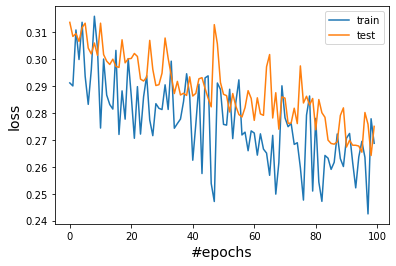

In [38]:
history = classifier.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=100, verbose=0)
# evaluate the model
_, train_acc = classifier.evaluate(x_train, y_train, verbose=0)
_, test_acc = classifier.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('#epochs',fontsize=14)
plt.ylabel('loss',fontsize=14)
plt.legend()
plt.show()

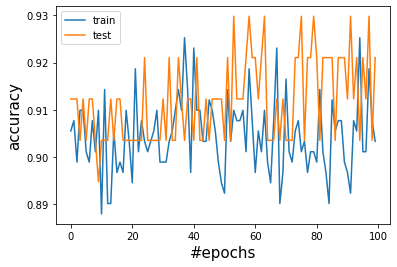

In [42]:
history = classifier.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=100, verbose=0)
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.xlabel('#epochs',fontsize=15)
plt.ylabel('accuracy',fontsize=15)
plt.legend()
plt.show()

In [43]:
y_pred= classifier.predict(x_test)
y_pred=(y_pred>0.5)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[70,  2],
       [ 7, 35]], dtype=int64)

accuracy:
>train:0.914                                          
>test:0.904 
>
Conclsion: 
>good fit , but need more data  for better performance                         
>svm& Rf  perform better than neural networks

Created by Nikhil Reddy